In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

In [2]:
dataset = pd.read_csv('Data/uae_used_cars.csv')
dataset

Make                   Model  Year   Price  Mileage  \
0            toyota                   camry  2016   47819   156500   
1               kia                 sorento  2013   61250   169543   
2              mini                  cooper  2023   31861   221583   
3            nissan                  altima  2016  110322    69754   
4            toyota  land-cruiser-76-series  2020  139994    71399   
...             ...                     ...   ...     ...      ...   
9995          tesla                 model-3  2018  273413    76920   
9996           audi                      a3  2022   80053   258150   
9997         toyota                   prado  2014  183381    80525   
9998        peugeot                  expert  2016   40876   288305   
9999  mercedes-benz                 c-class  2009  150261   283648   

                 Body Type Cylinders            Transmission Fuel Type  Color  \
0                    Sedan         4  Automatic Transmission  Gasoline  Black   
1                      SUV         4  Automatic Transmission  Gasoline   Grey   
2     Soft Top Convertible         4  Automatic Transmission  Gasoline   Grey   
3                    Sedan         4  Automatic Transmission  Gasoline    Red   
4            Pick Up Truck         4     Manual Transmission  Gasoline  White   
...                    ...       ...                     ...       ...    ...   
9995                 Sedan       NaN  Automatic Transmission  Electric  White   
9996                 Sedan         4  Automatic Transmission  Gasoline    Red   
9997                   SUV         6  Automatic Transmission  Gasoline  White   
9998         Utility Truck         4  Automatic Transmission    Diesel  White   
9999                 Sedan         4  Automatic Transmission  Gasoline  White   

        Location                                        Description  
0          Dubai  2016 toyota camry with Rear camera, Leather se...  
1      Abu Dhabi  2013 kia sorento with Sunroof, Adaptive cruise...  
2          Dubai  2023 mini cooper with Adaptive cruise control,...  
3          Dubai  2016 nissan altima with Rear camera, Adaptive ...  
4          Dubai  2020 toyota land-cruiser-76-series with Adapti...  
...          ...                                                ...  
9995       Dubai  2018 tesla model-3 with Bluetooth, Sunroof, Le...  
9996       Dubai  2022 audi a3 with Sunroof, Bluetooth, Rear cam...  
9997       Dubai  2014 toyota prado with Rear camera, Adaptive c...  
9998       Dubai  2016 peugeot expert with Navigation system, Re...  
9999       Dubai  2009 mercedes-benz c-class with Rear camera, N...  

[10000 rows x 12 columns]

In [3]:
#Display the number of rows and columns
dataset.shape

(10000, 12)

In [4]:
# Display all the columns
dataset.columns

Index(['Make', 'Model', 'Year', 'Price', 'Mileage', 'Body Type', 'Cylinders',
       'Transmission', 'Fuel Type', 'Color', 'Location', 'Description'],
      dtype='object')

In [5]:
# Delete the record which are blanks
dataset= dataset.dropna(how = "all")
dataset

Make                   Model  Year   Price  Mileage  \
0            toyota                   camry  2016   47819   156500   
1               kia                 sorento  2013   61250   169543   
2              mini                  cooper  2023   31861   221583   
3            nissan                  altima  2016  110322    69754   
4            toyota  land-cruiser-76-series  2020  139994    71399   
...             ...                     ...   ...     ...      ...   
9995          tesla                 model-3  2018  273413    76920   
9996           audi                      a3  2022   80053   258150   
9997         toyota                   prado  2014  183381    80525   
9998        peugeot                  expert  2016   40876   288305   
9999  mercedes-benz                 c-class  2009  150261   283648   

                 Body Type Cylinders            Transmission Fuel Type  Color  \
0                    Sedan         4  Automatic Transmission  Gasoline  Black   
1                      SUV         4  Automatic Transmission  Gasoline   Grey   
2     Soft Top Convertible         4  Automatic Transmission  Gasoline   Grey   
3                    Sedan         4  Automatic Transmission  Gasoline    Red   
4            Pick Up Truck         4     Manual Transmission  Gasoline  White   
...                    ...       ...                     ...       ...    ...   
9995                 Sedan       NaN  Automatic Transmission  Electric  White   
9996                 Sedan         4  Automatic Transmission  Gasoline    Red   
9997                   SUV         6  Automatic Transmission  Gasoline  White   
9998         Utility Truck         4  Automatic Transmission    Diesel  White   
9999                 Sedan         4  Automatic Transmission  Gasoline  White   

        Location                                        Description  
0          Dubai  2016 toyota camry with Rear camera, Leather se...  
1      Abu Dhabi  2013 kia sorento with Sunroof, Adaptive cruise...  
2          Dubai  2023 mini cooper with Adaptive cruise control,...  
3          Dubai  2016 nissan altima with Rear camera, Adaptive ...  
4          Dubai  2020 toyota land-cruiser-76-series with Adapti...  
...          ...                                                ...  
9995       Dubai  2018 tesla model-3 with Bluetooth, Sunroof, Le...  
9996       Dubai  2022 audi a3 with Sunroof, Bluetooth, Rear cam...  
9997       Dubai  2014 toyota prado with Rear camera, Adaptive c...  
9998       Dubai  2016 peugeot expert with Navigation system, Re...  
9999       Dubai  2009 mercedes-benz c-class with Rear camera, N...  

[10000 rows x 12 columns]

In [6]:
#Display the number of rows and columns
dataset.shape

(10000, 12)

In [7]:
# Display number of Models without any duplicate values
len(dataset["Model"].unique())

488

In [8]:
#Display the first 5 rows only
dataset.head()

Make                   Model  Year   Price  Mileage  \
0  toyota                   camry  2016   47819   156500   
1     kia                 sorento  2013   61250   169543   
2    mini                  cooper  2023   31861   221583   
3  nissan                  altima  2016  110322    69754   
4  toyota  land-cruiser-76-series  2020  139994    71399   

              Body Type Cylinders            Transmission Fuel Type  Color  \
0                 Sedan         4  Automatic Transmission  Gasoline  Black   
1                   SUV         4  Automatic Transmission  Gasoline   Grey   
2  Soft Top Convertible         4  Automatic Transmission  Gasoline   Grey   
3                 Sedan         4  Automatic Transmission  Gasoline    Red   
4         Pick Up Truck         4     Manual Transmission  Gasoline  White   

     Location                                        Description  
0       Dubai  2016 toyota camry with Rear camera, Leather se...  
1   Abu Dhabi  2013 kia sorento with Sunroof, Adaptive cruise...  
2       Dubai  2023 mini cooper with Adaptive cruise control,...  
3       Dubai  2016 nissan altima with Rear camera, Adaptive ...  
4       Dubai  2020 toyota land-cruiser-76-series with Adapti...

In [9]:
#Display the last 5 rows only
dataset.tail()

Make    Model  Year   Price  Mileage      Body Type Cylinders  \
9995          tesla  model-3  2018  273413    76920          Sedan       NaN   
9996           audi       a3  2022   80053   258150          Sedan         4   
9997         toyota    prado  2014  183381    80525            SUV         6   
9998        peugeot   expert  2016   40876   288305  Utility Truck         4   
9999  mercedes-benz  c-class  2009  150261   283648          Sedan         4   

                Transmission Fuel Type  Color Location  \
9995  Automatic Transmission  Electric  White    Dubai   
9996  Automatic Transmission  Gasoline    Red    Dubai   
9997  Automatic Transmission  Gasoline  White    Dubai   
9998  Automatic Transmission    Diesel  White    Dubai   
9999  Automatic Transmission  Gasoline  White    Dubai   

                                            Description  
9995  2018 tesla model-3 with Bluetooth, Sunroof, Le...  
9996  2022 audi a3 with Sunroof, Bluetooth, Rear cam...  
9997  2014 toyota prado with Rear camera, Adaptive c...  
9998  2016 peugeot expert with Navigation system, Re...  
9999  2009 mercedes-benz c-class with Rear camera, N...

In [10]:
# dispaly all the rows from 0 to 10
dataset [0:11]

Make                   Model  Year   Price  Mileage  \
0          toyota                   camry  2016   47819   156500   
1             kia                 sorento  2013   61250   169543   
2            mini                  cooper  2023   31861   221583   
3          nissan                  altima  2016  110322    69754   
4          toyota  land-cruiser-76-series  2020  139994    71399   
5       chevrolet               silverado  2010   43194   233934   
6       chevrolet                  camaro  2024   94100   147140   
7        cadillac                     srx  2024   30047    51876   
8   mercedes-benz                 g-class  2009  603574    32956   
9        infiniti                     q50  2013   49531    11954   
10         toyota            land-cruiser  2008  470284   143940   

               Body Type Cylinders            Transmission Fuel Type   Color  \
0                  Sedan         4  Automatic Transmission  Gasoline   Black   
1                    SUV         4  Automatic Transmission  Gasoline    Grey   
2   Soft Top Convertible         4  Automatic Transmission  Gasoline    Grey   
3                  Sedan         4  Automatic Transmission  Gasoline     Red   
4          Pick Up Truck         4     Manual Transmission  Gasoline   White   
5          Pick Up Truck         8  Automatic Transmission  Gasoline   Brown   
6                  Coupe         8  Automatic Transmission  Gasoline  Silver   
7                    SUV         6  Automatic Transmission  Gasoline    Gold   
8                    SUV         8  Automatic Transmission  Gasoline   Black   
9                  Sedan         4  Automatic Transmission  Gasoline   White   
10                   SUV         6  Automatic Transmission    Diesel   White   

      Location                                        Description  
0        Dubai  2016 toyota camry with Rear camera, Leather se...  
1    Abu Dhabi  2013 kia sorento with Sunroof, Adaptive cruise...  
2        Dubai  2023 mini cooper with Adaptive cruise control,...  
3        Dubai  2016 nissan altima with Rear camera, Adaptive ...  
4        Dubai  2020 toyota land-cruiser-76-series with Adapti...  
5        Dubai  2010 chevrolet silverado with Navigation syste...  
6        Dubai  2024 chevrolet camaro with Leather seats, Sunr...  
7    Abu Dhabi  2024 cadillac srx with Rear camera, Adaptive c...  
8        Dubai  2009 mercedes-benz g-class with Navigation sys...  
9        Dubai  2013 infiniti q50 with Sunroof, Leather seats....  
10       Dubai  2008 toyota land-cruiser with Adaptive cruise ...

In [11]:
#Usint loc command dispaly all the rows from 10 t0 30 and coulmns 'Make' to 'Body Type'
dataset.loc[10:30, 'Make' : 'Body Type']

Make           Model  Year    Price  Mileage  \
10         toyota    land-cruiser  2008   470284   143940   
11  mercedes-benz  amg-gt-4-doors  2019   479068   291481   
12          mazda               6  2008    38078   269628   
13         nissan         x-trail  2020    85012    28571   
14  mercedes-benz       cls-class  2012    57357   280953   
15         nissan          patrol  2006   360078   269976   
16         nissan         x-trail  2006    49302   121173   
17         toyota           yaris  2009    32656   254828   
18           jeep  grand-cherokee  2021    36447   247240   
19            kia          optima  2014    29408   138591   
20        ferrari             599  2024  4197282   220775   
21            bmw              x6  2021   342897   292448   
22        porsche         cayenne  2024   380035   193415   
23        bentley  continental-gt  2008   208965   229097   
24     land-rover     range-rover  2024   222044    33480   
25         nissan           sunny  2008    28063   294765   
26  mercedes-benz        gl-class  2018   120721   220931   
27         nissan          altima  2009    58468   194346   
28         toyota    land-cruiser  2011   331226   198407   
29      chevrolet        corvette  2015   162913   215495   
30        porsche        panamera  2018   292855    39608   

               Body Type  
10                   SUV  
11                 Sedan  
12                 Sedan  
13                   SUV  
14                 Sedan  
15                   SUV  
16             Crossover  
17             Hatchback  
18                   SUV  
19                 Sedan  
20                 Coupe  
21                   SUV  
22                   SUV  
23                 Coupe  
24                   SUV  
25                 Sedan  
26                   SUV  
27                 Sedan  
28                   SUV  
29  Hard Top Convertible  
30                 Sedan

In [12]:
#Using iloc command display all the rows from 14 to end and 4th to 7th column
dataset.iloc[14:,3:7]

Price  Mileage      Body Type Cylinders
14     57357   280953          Sedan         8
15    360078   269976            SUV         8
16     49302   121173      Crossover         4
17     32656   254828      Hatchback         4
18     36447   247240            SUV         8
...      ...      ...            ...       ...
9995  273413    76920          Sedan       NaN
9996   80053   258150          Sedan         4
9997  183381    80525            SUV         6
9998   40876   288305  Utility Truck         4
9999  150261   283648          Sedan         4

[9986 rows x 4 columns]

In [13]:
dataset['Make'].describe()

count             10000
unique               65
top       mercedes-benz
freq               1486
Name: Make, dtype: object

In [14]:
dataset['Price'].max()

14686975

<Axes: title={'center': 'Cars body type'}, xlabel='Body Type'>

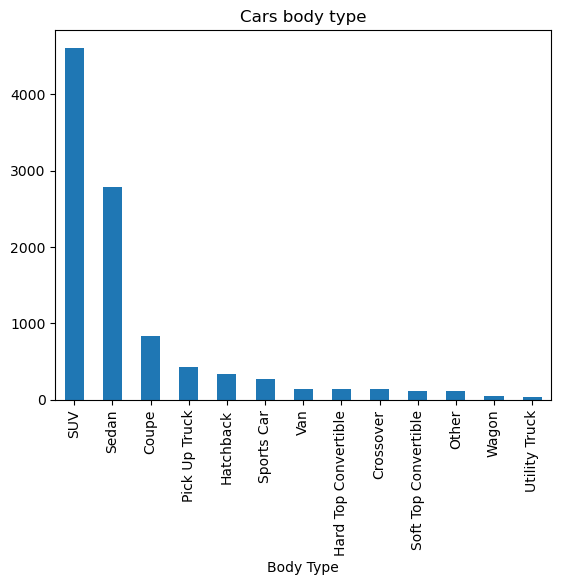

In [15]:
# Display a Bar chart to display students by division, give title as Students by Division
dataset['Body Type'].value_counts().plot(kind='bar',title='Cars body type')

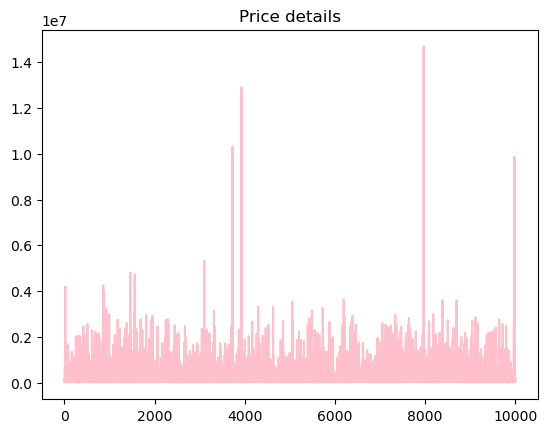

In [16]:
# Display a line chart for Price
dataset['Price'].plot(title='Price details', kind='line', color='pink')
plt.show()

In [17]:
dataset['Fuel Type'].value_counts().plot(kind='bar', title='Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()


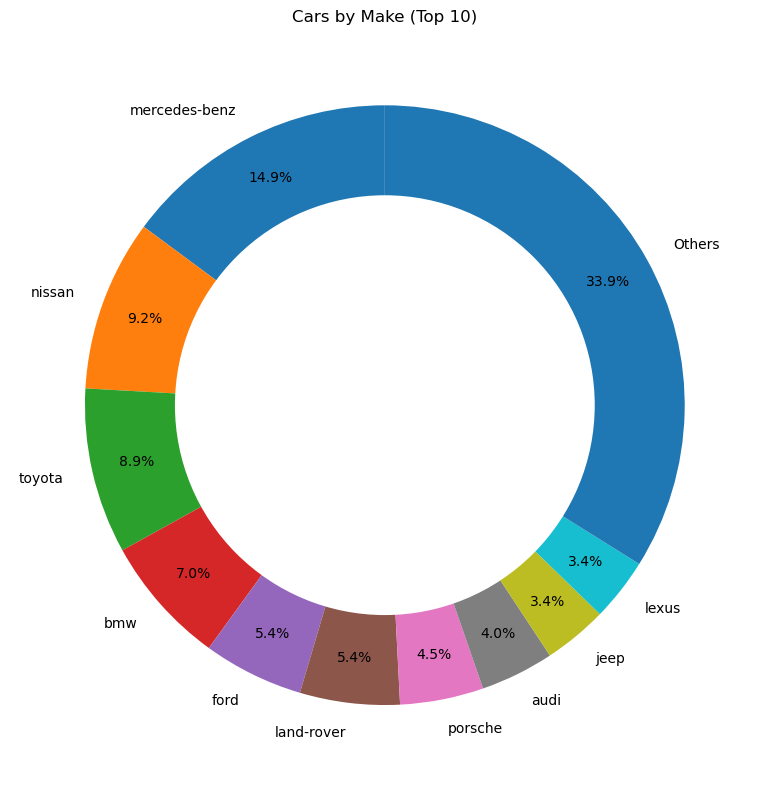

In [18]:
# Get the top 10 car makes
top_makes = dataset['Make'].value_counts().nlargest(10)
other_makes = dataset['Make'].value_counts().iloc[10:].sum()

# Combine top 10 with "Others"
top_makes['Others'] = other_makes

# Make the pie chart
plt.figure(figsize=(8, 8))  # make it larger
top_makes.plot(
    kind='pie',
    title='Cars by Make (Top 10)',
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

# Make it a donut chart for cleaner labels
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.tight_layout()
plt.show()

In [19]:
dataset.mean(axis=1, numeric_only=True)

0        68778.333333
1        77602.000000
2        85155.666667
3        60697.333333
4        71137.666667
            ...      
9995    117450.333333
9996    113408.333333
9997     88640.000000
9998    110399.000000
9999    145306.000000
Length: 10000, dtype: float64

In [20]:
dataset.median(numeric_only=True) 

Year         2014.0
Price      102766.0
Mileage    154370.5
dtype: float64

In [21]:
dataset['Price'].median()

102766.0

In [22]:
dataset['Color'].mode() 

0    White
Name: Color, dtype: object

In [23]:
dataset['Year'].min() 

2005

In [24]:
dataset['Year'].max() 

2024

In [25]:
dataset['Mileage'].skew()

np.float64(0.0040590594782539185)

In [26]:
dataset['Mileage'].kurt()

np.float64(-1.2046847801282226)

In [27]:
# find the different quantiles for the Mileage


five_num = [
    dataset["Mileage"].quantile(0),    # Minimum (0th percentile)
    dataset["Mileage"].quantile(0.25), # Q1 (25th percentile)
    dataset["Mileage"].quantile(0.50), # Median (50th percentile)
    dataset["Mileage"].quantile(0.75), # Q3 (75th percentile)
    dataset["Mileage"].quantile(1)     # Maximum (100th percentile)
]
 
five_num 

[np.float64(10006.0),
 np.float64(82904.0),
 np.float64(154370.5),
 np.float64(227551.25),
 np.float64(299996.0)]

In [28]:
dataset["Mileage"].quantile(0.75) - dataset["Mileage"].quantile(0.25) 

np.float64(144647.25)

<Axes: >

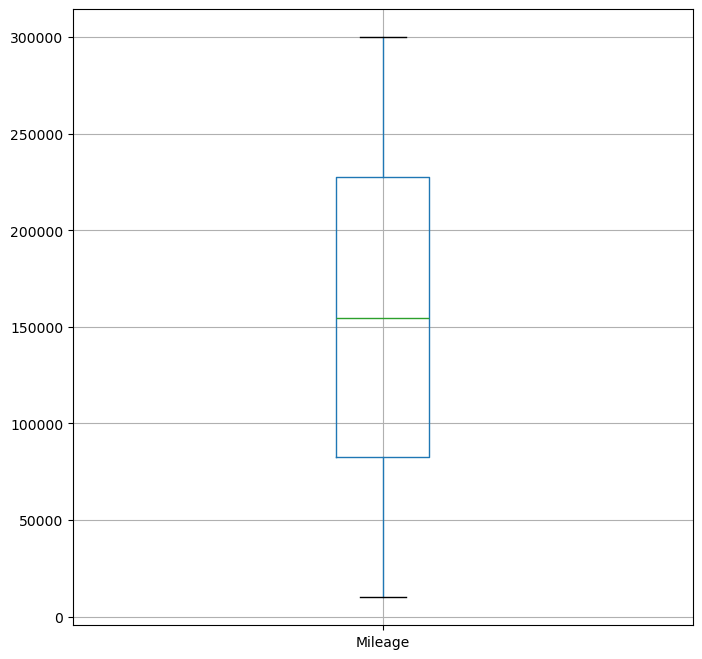

In [29]:
dataset.boxplot(column="Mileage", 
               return_type='axes', 
               figsize=(8,8))  

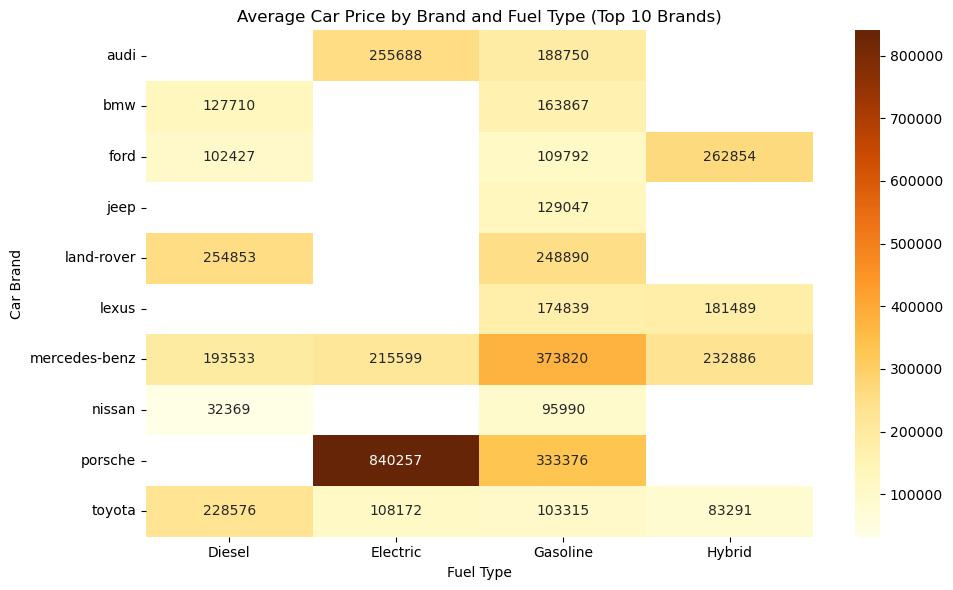

In [30]:
dataset = dataset.dropna(subset=['Make', 'Fuel Type', 'Price'])

# keep only top 10 most common car brands to make it clearer
top_makes = dataset['Make'].value_counts().head(10).index
dataset_filtered = dataset[dataset['Make'].isin(top_makes)]

# create pivot table
pivot_table = dataset_filtered.pivot_table(index='Make', columns='Fuel Type', values='Price', aggfunc='mean')

# create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='YlOrBr', annot=True, fmt='.0f')
plt.xlabel('Fuel Type')
plt.ylabel('Car Brand')
plt.title('Average Car Price by Brand and Fuel Type (Top 10 Brands)')
plt.tight_layout()
plt.show()

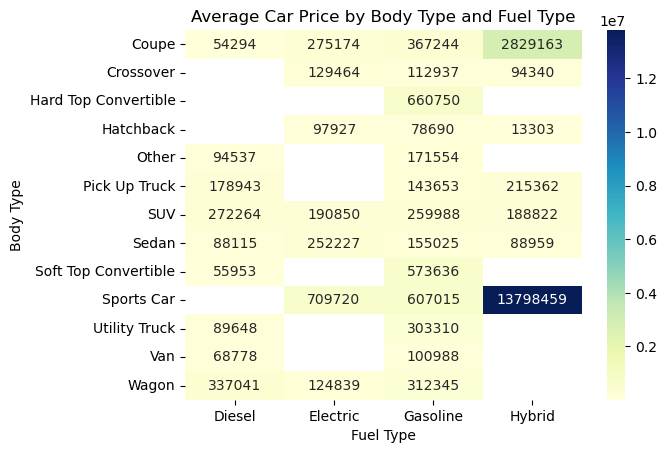

In [31]:
# Create a pivot table: rows = Body Type, columns = Fuel Type, values = average Price
pivot_table = dataset.pivot_table(index='Body Type', columns='Fuel Type', values='Price', aggfunc='mean')

# Plot the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average Car Price by Body Type and Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Body Type')
plt.show()

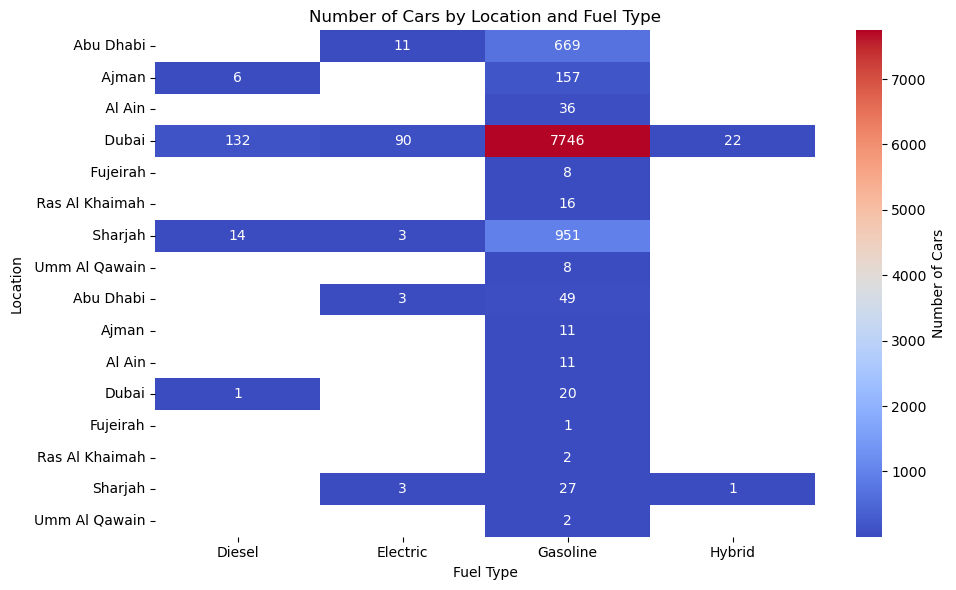

In [32]:
# Load the CSV file
file_path = 'Data/uae_used_cars.csv'  # Your dataset
cars_data = pd.read_csv(file_path)

# Creating a pivot table by Location and Fuel Type
heatmap_data = cars_data.pivot_table(
    index='Location',
    columns='Fuel Type',
    values='Make',  # or any column
    aggfunc='count'  # count how many cars
)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    cbar_kws={'label': 'Number of Cars'}
)

plt.title('Number of Cars by Location and Fuel Type')
plt.ylabel('Location')
plt.xlabel('Fuel Type')
plt.tight_layout()
plt.show()

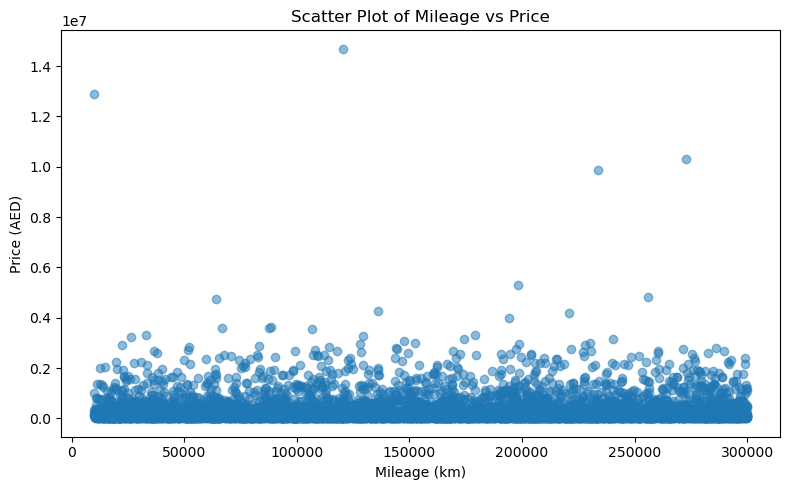

In [33]:
x_values = dataset['Mileage']
y_values = dataset['Price']

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, alpha=0.5)

# Add labels and a title
plt.xlabel("Mileage (km)")
plt.ylabel("Price (AED)")
plt.title("Scatter Plot of Mileage vs Price")

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
dataset['Price'] = dataset['Price'].astype(float)
dataset.head()

Make                   Model  Year     Price  Mileage  \
0  toyota                   camry  2016   47819.0   156500   
1     kia                 sorento  2013   61250.0   169543   
2    mini                  cooper  2023   31861.0   221583   
3  nissan                  altima  2016  110322.0    69754   
4  toyota  land-cruiser-76-series  2020  139994.0    71399   

              Body Type Cylinders            Transmission Fuel Type  Color  \
0                 Sedan         4  Automatic Transmission  Gasoline  Black   
1                   SUV         4  Automatic Transmission  Gasoline   Grey   
2  Soft Top Convertible         4  Automatic Transmission  Gasoline   Grey   
3                 Sedan         4  Automatic Transmission  Gasoline    Red   
4         Pick Up Truck         4     Manual Transmission  Gasoline  White   

     Location                                        Description  
0       Dubai  2016 toyota camry with Rear camera, Leather se...  
1   Abu Dhabi  2013 kia sorento with Sunroof, Adaptive cruise...  
2       Dubai  2023 mini cooper with Adaptive cruise control,...  
3       Dubai  2016 nissan altima with Rear camera, Adaptive ...  
4       Dubai  2020 toyota land-cruiser-76-series with Adapti...

In [35]:
# Bigger figure size
plt.figure(figsize=(12, 8))  # width=12, height=8

sns.boxplot(x="Body Type", y="Mileage", data=dataset, palette="coolwarm")

plt.title("Mileage Distribution by Body Type", fontsize=16)
plt.xlabel("Body Type", fontsize=12)
plt.ylabel("Mileage (km)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

/var/folders/kq/1cpkxsyx75j60jfhm6shgn180000gn/T/ipykernel_47173/811770429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Body Type", y="Mileage", data=dataset, palette="coolwarm")


In [36]:
dataset.plot.scatter(x='Mileage', y='Price', s=100, c='lightblue')
plt.title('Mileage vs Price')

Text(0.5, 1.0, 'Mileage vs Price')

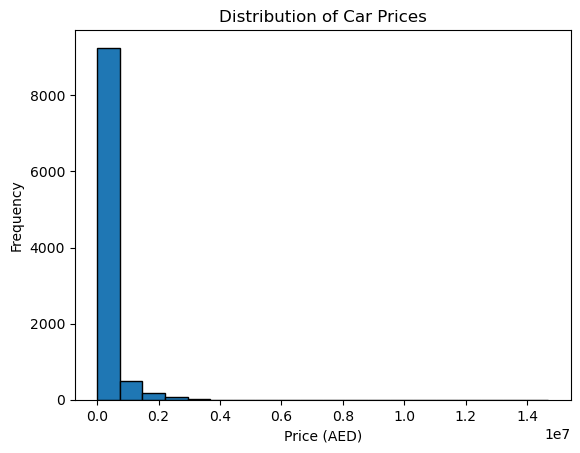

In [37]:
# create a histogram for car prices
plt.hist(dataset['Price'], bins=20, edgecolor='black')

# add labels and title
plt.xlabel('Price (AED)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')

# display the plot
plt.show()

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(df2["Mileage"], bins=30, color="skyblue", edgecolor="black", alpha=0.8)

plt.title("Histogram: Mileage Frequency", fontsize=16, fontweight="bold")
plt.xlabel("Mileage (km)", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

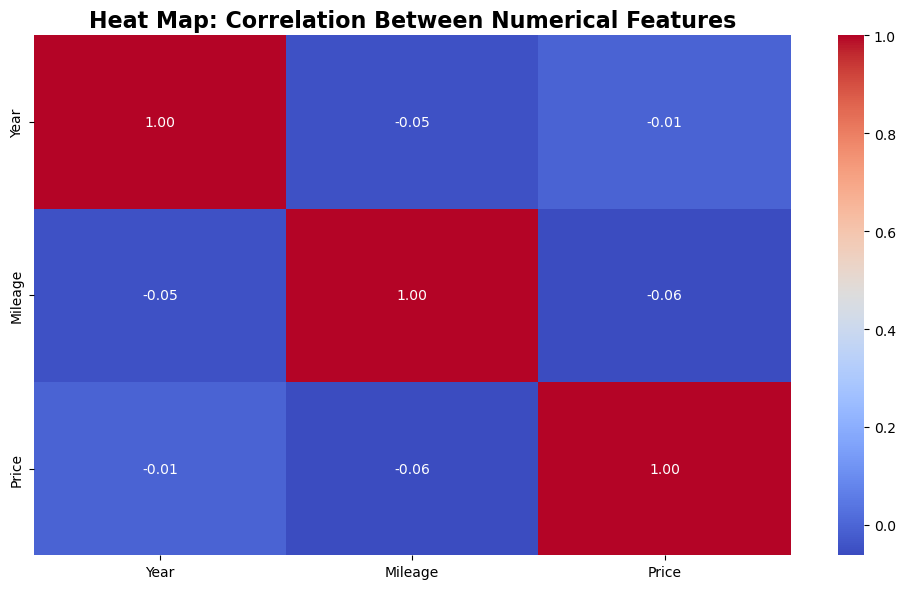

In [58]:
# =============================
# HEATMAP – Correlation Matrix
# =============================

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heat Map: Correlation Between Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


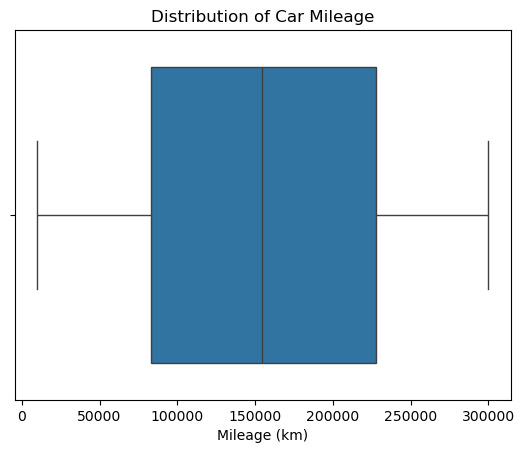

In [38]:
sns.boxplot(x=dataset['Mileage'])
plt.xlabel('Mileage (km)')
plt.title('Distribution of Car Mileage')
plt.show()

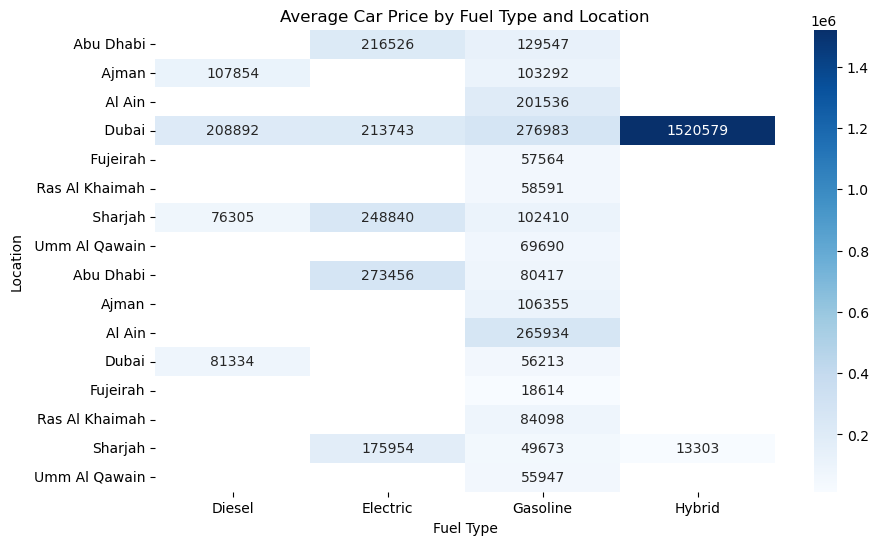

In [39]:
# Create a pivot table
pivot_table = pd.pivot_table(dataset, 
                             index='Location', 
                             columns='Fuel Type', 
                             values='Price', 
                             aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f')

# Add labels and title
plt.ylabel('Location')
plt.xlabel('Fuel Type')
plt.title('Average Car Price by Fuel Type and Location')

# Display the plot
plt.show()

/var/folders/kq/1cpkxsyx75j60jfhm6shgn180000gn/T/ipykernel_47173/4266848538.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


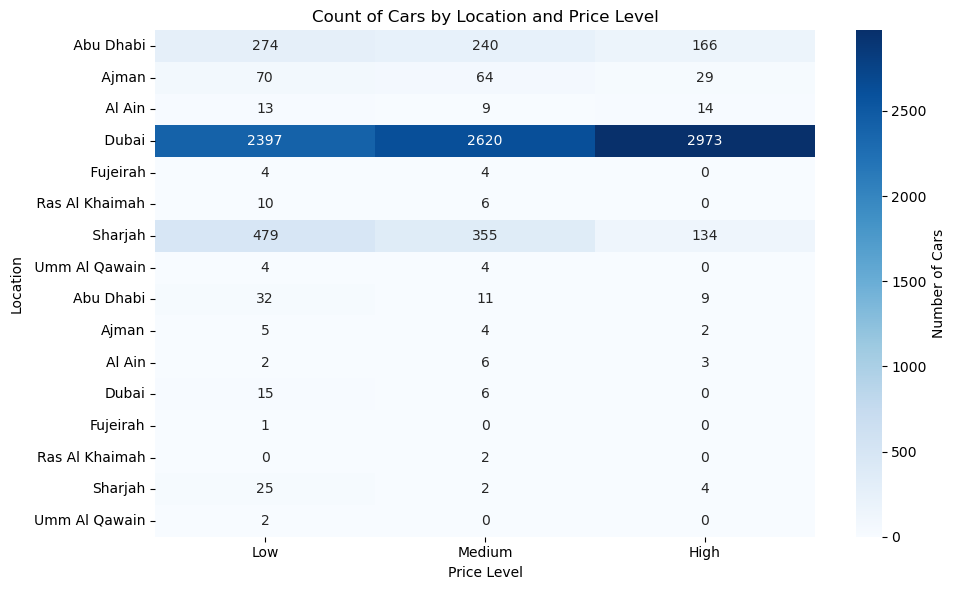

In [40]:
# Keep rows with a valid Price and Location
dataset = dataset.dropna(subset=['Price', 'Location'])

# Discretize Price into 3 quantile-based categories
dataset['Price_Level'] = pd.qcut(dataset['Price'], 3, labels=['Low', 'Medium', 'High'])

# Build a count pivot table: rows = Location, cols = Price level
pivot = pd.pivot_table(
    dataset,
    index='Location',
    columns='Price_Level',
    values='Price',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Number of Cars'})
plt.title('Count of Cars by Location and Price Level')
plt.xlabel('Price Level')
plt.ylabel('Location')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [41]:
# Let's first check if data is normally dostributed (shapiro)
# If p < 0.05 → data is not normal.
# If p ≥ 0.05 → data is normally distributed.
from scipy.stats import shapiro, spearmanr  # ✅ added spearmanr import
import pandas as pd

# Load dataset (only if not already loaded)
try:
    dataset
except NameError:
    dataset = pd.read_csv("Data/uae_used_cars.csv")

# --- Normality test using Shapiro-Wilk ---
# If p < 0.05 → data is NOT normal.
# If p ≥ 0.05 → data IS normally distributed.

stat, p = shapiro(dataset['Price'])
print(f"Shapiro-Wilk Test for Price: statistic={stat:.4f}, p={p:.4f}")
if p < 0.05:
    print("→ Price data is NOT normally distributed.\n")
else:
    print("→ Price data is normally distributed.\n")

stat, p = shapiro(dataset['Mileage'])
print(f"Shapiro-Wilk Test for Mileage: statistic={stat:.4f}, p={p:.4f}")
if p < 0.05:
    print("→ Mileage data is NOT normally distributed.\n")
else:
    print("→ Mileage data is normally distributed.\n")

# --- Spearman Rank Correlation (non-parametric correlation test) ---
r, p_value = spearmanr(dataset['Price'], dataset['Mileage'])
print(f"Spearman's correlation coefficient: {r:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("→ Significant correlation between Price and Mileage.")
else:
    print("→ No significant correlation between Price and Mileage.")


Shapiro-Wilk Test for Price: statistic=0.4333, p=0.0000
→ Price data is NOT normally distributed.

Shapiro-Wilk Test for Mileage: statistic=0.9547, p=0.0000
→ Mileage data is NOT normally distributed.

Spearman's correlation coefficient: 0.0072
P-value: 0.4700
→ No significant correlation between Price and Mileage.


/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
# Perform Pearson's correlation between Price and Mileage
r, p_value = pearsonr(dataset['Price'], dataset['Mileage'])

# Print the results
print(f"Pearson's Correlation Coefficient: {r:.4f}")
print(f"P-Value: {p_value:.4f}")


Pearson's Correlation Coefficient: 0.0107
P-Value: 0.2854


In [43]:
# Identify numeric columns in your dataset
numeric_cols = dataset.select_dtypes(include=['number']).columns

# Compute Pearson correlation matrix
correlation_matrix = dataset[numeric_cols].corr(method='pearson')

# Display the correlation matrix
print("Pearson Correlation Matrix for Numeric Columns:")
print(correlation_matrix)

Pearson Correlation Matrix for Numeric Columns:
             Year     Price   Mileage
Year     1.000000  0.000188 -0.017118
Price    0.000188  1.000000  0.010685
Mileage -0.017118  0.010685  1.000000


In [44]:
# Drop rows with missing values in Price or Mileage
dataset_clean = dataset.dropna(subset=['Price', 'Mileage'])

# Perform Spearman's correlation
r, p_value = spearmanr(dataset_clean['Price'], dataset_clean['Mileage'])

# Print results
print(f"Spearman's Correlation Coefficient: {r:.4f}")
print(f"P-Value: {p_value:.4f}")

Spearman's Correlation Coefficient: 0.0072
P-Value: 0.4700


In [45]:
# Create the cross-tab
contingency_data = pd.crosstab(dataset['Fuel Type'], dataset['Transmission'], margins=False)

# Print the table
print(contingency_data)

Transmission  Automatic Transmission  Manual Transmission
Fuel Type                                                
Diesel                            98                   55
Electric                         110                    0
Gasoline                        9396                  318
Hybrid                            22                    1


In [46]:
# Create cross-tab between Fuel Type and Transmission
contingency_data = pd.crosstab(dataset['Fuel Type'], dataset['Transmission'])

# Apply Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_data)

# Print results
print(f"Chi-Square Value: {chi2:.3f}")
print(f"P-Value: {p:.3f}")
print(f"Degrees of Freedom: {dof}")

# Hypothesis result
if p > 0.05:
    print("Conclusion: Independent categories (No relationship)")
else:
    print("Conclusion: Dependent categories (There IS a relationship)")

Chi-Square Value: 451.019
P-Value: 0.000
Degrees of Freedom: 3
Conclusion: Dependent categories (There IS a relationship)


In [47]:
# Extract the Price column
Price = dataset['Price']

# Print the Price column
print(Price)

0        47819.0
1        61250.0
2        31861.0
3       110322.0
4       139994.0
          ...   
9995    273413.0
9996     80053.0
9997    183381.0
9998     40876.0
9999    150261.0
Name: Price, Length: 10000, dtype: float64


In [48]:
# Print the mean price of all cars
print("Average Price of All Cars:", dataset['Price'].mean())

# Extract cars located in Dubai (instead of CIS students)
dataset_Dubai = dataset[dataset['Location'] == 'Dubai']

# Show only their prices
print(dataset_Dubai['Price'])

Average Price of All Cars: 245234.5079
19       29408.0
121      59471.0
282      28674.0
293      21558.0
622      68392.0
650      25311.0
1049     30000.0
1321     40100.0
1399     45228.0
1430    158131.0
2417     71984.0
2605    125630.0
4411     97483.0
4859     50777.0
5256     81334.0
5707     49657.0
6371     48099.0
6735     59480.0
7502     39328.0
8555     16907.0
9134     58640.0
Name: Price, dtype: float64


In [49]:
# Extract Price values
Price = dataset['Price'].dropna()  # Remove missing values

# Perform Shapiro-Wilk Test
r, p = shapiro(Price)

print('Test Statistic = %.3f, p-value = %.10f' % (r, p))

# Interpretation
if p > 0.05:
    print('Conclusion: Price appears to be Normally Distributed ')
else:
    print('Conclusion: Price is NOT Normally Distributed ')

Test Statistic = 0.433, p-value = 0.0000000000
Conclusion: Price is NOT Normally Distributed 


/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [50]:
from scipy.stats import ttest_1samp

# Extract Dubai cars prices (similar to CIS group idea)
dubai_prices = dataset[dataset['Location'] == 'Dubai']['Price'].dropna()

# Calculate the overall mean price
overall_mean = dataset['Price'].mean()

print("Overall Mean Price:", overall_mean)

# Perform One Sample T-test
t_stat, p_value = ttest_1samp(dubai_prices, overall_mean)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("Conclusion: Dubai car prices are not significantly different from overall prices")
else:
    print("Conclusion: Dubai car prices are significantly different from overall prices")

Overall Mean Price: 245234.5079
T-statistic: -24.5405
P-value: 0.0000
Conclusion: Dubai car prices are significantly different from overall prices


In [51]:
# Use all columns except 'Price' as features
X = dataset.drop('Price', axis=1).values

# Use 'Price' as the target variable
y = dataset['Price'].values

print("Feature matrix (X):")
print(X)

print("\n Target vector (y):")
print(y)


Feature matrix (X):
[['toyota' 'camry' 2016 ... ' Dubai'
  '2016 toyota camry with Rear camera, Leather seats. Condition: Engine repaired.'
  'Low']
 ['kia' 'sorento' 2013 ... ' Abu Dhabi'
  '2013 kia sorento with Sunroof, Adaptive cruise control, Rear camera, Bluetooth. Condition: Accident history.'
  'Low']
 ['mini' 'cooper' 2023 ... ' Dubai'
  '2023 mini cooper with Adaptive cruise control, Rear camera, Sunroof, Bluetooth. Condition: Engine repaired.'
  'Low']
 ...
 ['toyota' 'prado' 2014 ... ' Dubai'
  '2014 toyota prado with Rear camera, Adaptive cruise control. Condition: No damage.'
  'High']
 ['peugeot' 'expert' 2016 ... ' Dubai'
  '2016 peugeot expert with Navigation system, Rear camera, Leather seats. Condition: Minor scratches.'
  'Low']
 ['mercedes-benz' 'c-class' 2009 ... ' Dubai'
  '2009 mercedes-benz c-class with Rear camera, Navigation system. Condition: Accident history.'
  'Medium']]

 Target vector (y):
[ 47819.  61250.  31861. ... 183381.  40876. 150261.]


In [52]:
print(X)

[['toyota' 'camry' 2016 ... ' Dubai'
  '2016 toyota camry with Rear camera, Leather seats. Condition: Engine repaired.'
  'Low']
 ['kia' 'sorento' 2013 ... ' Abu Dhabi'
  '2013 kia sorento with Sunroof, Adaptive cruise control, Rear camera, Bluetooth. Condition: Accident history.'
  'Low']
 ['mini' 'cooper' 2023 ... ' Dubai'
  '2023 mini cooper with Adaptive cruise control, Rear camera, Sunroof, Bluetooth. Condition: Engine repaired.'
  'Low']
 ...
 ['toyota' 'prado' 2014 ... ' Dubai'
  '2014 toyota prado with Rear camera, Adaptive cruise control. Condition: No damage.'
  'High']
 ['peugeot' 'expert' 2016 ... ' Dubai'
  '2016 peugeot expert with Navigation system, Rear camera, Leather seats. Condition: Minor scratches.'
  'Low']
 ['mercedes-benz' 'c-class' 2009 ... ' Dubai'
  '2009 mercedes-benz c-class with Rear camera, Navigation system. Condition: Accident history.'
  'Medium']]


In [53]:
print(y)

[ 47819.  61250.  31861. ... 183381.  40876. 150261.]


In [54]:
from sklearn.impute import SimpleImputer
# Select numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
print("Numeric columns:", list(numeric_cols))

# Create and apply the imputer
imputer = SimpleImputer(strategy='mean')
dataset[numeric_cols] = imputer.fit_transform(dataset[numeric_cols])

# Show the result
print("Missing values handled successfully!")
print(dataset[numeric_cols].head())


Numeric columns: ['Year', 'Price', 'Mileage']
Missing values handled successfully!
     Year     Price   Mileage
0  2016.0   47819.0  156500.0
1  2013.0   61250.0  169543.0
2  2023.0   31861.0  221583.0
3  2016.0  110322.0   69754.0
4  2020.0  139994.0   71399.0


In [55]:
print(X)

[['toyota' 'camry' 2016 ... ' Dubai'
  '2016 toyota camry with Rear camera, Leather seats. Condition: Engine repaired.'
  'Low']
 ['kia' 'sorento' 2013 ... ' Abu Dhabi'
  '2013 kia sorento with Sunroof, Adaptive cruise control, Rear camera, Bluetooth. Condition: Accident history.'
  'Low']
 ['mini' 'cooper' 2023 ... ' Dubai'
  '2023 mini cooper with Adaptive cruise control, Rear camera, Sunroof, Bluetooth. Condition: Engine repaired.'
  'Low']
 ...
 ['toyota' 'prado' 2014 ... ' Dubai'
  '2014 toyota prado with Rear camera, Adaptive cruise control. Condition: No damage.'
  'High']
 ['peugeot' 'expert' 2016 ... ' Dubai'
  '2016 peugeot expert with Navigation system, Rear camera, Leather seats. Condition: Minor scratches.'
  'Low']
 ['mercedes-benz' 'c-class' 2009 ... ' Dubai'
  '2009 mercedes-benz c-class with Rear camera, Navigation system. Condition: Accident history.'
  'Medium']]


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [57]:
print(y)

[2269 3069 1115 ... 6770 1781 6138]


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [59]:
print(X_train)

[['honda' 'accord' 2020 ... ' Dubai'
  '2020 honda accord with Leather seats, Navigation system, Sunroof, Bluetooth. Condition: Repainted bumper.'
  'Low']
 ['land-rover' 'discovery' 2023 ... ' Dubai'
  '2023 land-rover discovery with Sunroof, Adaptive cruise control, Leather seats. Condition: Accident history.'
  'High']
 ['land-rover' 'range-rover' 2023 ... ' Dubai'
  '2023 land-rover range-rover with Sunroof, Navigation system. Condition: No damage.'
  'Medium']
 ...
 ['mercedes-benz' 'c-class' 2016 ... ' Sharjah'
  '2016 mercedes-benz c-class with Adaptive cruise control, Leather seats, Bluetooth. Condition: Repainted bumper.'
  'Medium']
 ['ford' 'f-series-pickup' 2007 ... ' Sharjah'
  '2007 ford f-series-pickup with Bluetooth, Sunroof, Leather seats, Navigation system. Condition: No damage.'
  'High']
 ['toyota' 'hiace' 2011 ... ' Dubai'
  '2011 toyota hiace with Leather seats, Sunroof. Condition: Minor scratches.'
  'Low']]


In [60]:
print(X_test)

[['toyota' 'hilux' 2006 ... ' Dubai'
  '2006 toyota hilux with Leather seats, Bluetooth, Sunroof. Condition: Accident history.'
  'Medium']
 ['audi' 's3rs3' 2014 ... ' Dubai'
  '2014 audi s3rs3 with Bluetooth, Sunroof. Condition: Repainted bumper.'
  'Medium']
 ['mercedes-benz' 'g-class' 2005 ... ' Dubai'
  '2005 mercedes-benz g-class with Bluetooth, Navigation system, Rear camera, Leather seats. Condition: No damage.'
  'High']
 ...
 ['land-rover' 'range-rover-sport' 2016 ... ' Dubai'
  '2016 land-rover range-rover-sport with Navigation system, Rear camera. Condition: No damage.'
  'High']
 ['bmw' 'x4' 2010 ... ' Dubai'
  '2010 bmw x4 with Adaptive cruise control, Sunroof. Condition: Minor scratches.'
  'High']
 ['kia' 'sportage' 2023 ... ' Dubai'
  '2023 kia sportage with Rear camera, Sunroof. Condition: No damage.'
  'Low']]


In [61]:
print(y_train)

[1256 6615 6186 ... 4284 7232 1974]


In [62]:
print(y_test)

[6041 6187 9025 ... 7132 6528  647]


In [63]:
# Separate features and target
X = dataset.drop('Price', axis=1)
y = dataset['Price']

# Convert categorical variables into numeric form (quick fix using get_dummies)
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  #  fit only on training data
X_test = sc.transform(X_test)        #  transform test data

print("Standardization complete!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Standardization complete!
Training data shape: (8000, 10593)
Testing data shape: (2000, 10593)


In [64]:
print(X_train)

[[-0.42660101 -0.51487343 -0.05006262 ... -0.01118104 -0.70439057
   1.41209489]
 [ 1.64689889 -0.80786498 -0.05006262 ... -0.01118104 -0.70439057
  -0.70816771]
 [-1.11776764 -1.71289234 -0.05006262 ... -0.01118104  1.41966693
  -0.70816771]
 ...
 [-0.25380935 -0.4954115  -0.05006262 ... -0.01118104  1.41966693
  -0.70816771]
 [-1.63614261 -1.20881649 -0.05006262 ... -0.01118104  1.41966693
  -0.70816771]
 [ 0.43735729 -1.09523287 -0.05006262 ... -0.01118104 -0.70439057
  -0.70816771]]


In [65]:
print(X_test)

[[ 1.64689889  0.19163034 -0.05006262 ... -0.01118104 -0.70439057
   1.41209489]
 [-0.42660101  1.67343518 -0.05006262 ... -0.01118104 -0.70439057
  -0.70816771]
 [-0.25380935  1.69405527 -0.05006262 ... -0.01118104  1.41966693
  -0.70816771]
 ...
 [-1.11776764  0.93712959 -0.05006262 ... -0.01118104 -0.70439057
   1.41209489]
 [ 1.30131558  1.08828787 -0.05006262 ... -0.01118104  1.41966693
  -0.70816771]
 [-0.94497598 -1.04543183 -0.05006262 ... -0.01118104  1.41966693
  -0.70816771]]


In [66]:
# Independent variable (Mileage), dependent variable (Price)
X = dataset.iloc[:, [4]].values  # Mileage column
y = dataset.iloc[:, [3]].values  # Price column
print(X)
print(y)

[[156500.]
 [169543.]
 [221583.]
 ...
 [ 80525.]
 [288305.]
 [283648.]]
[[ 47819.]
 [ 61250.]
 [ 31861.]
 ...
 [183381.]
 [ 40876.]
 [150261.]]


In [67]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [68]:
# Train the linear regression model
from sklearn.linear_model import LinearRegression
regressor_cars = LinearRegression()
regressor_cars.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predict the test set results
y_pred = regressor_cars.predict(X_test)
print(X_test)
print(y_pred)

[[176182.]
 [ 32803.]
 [239032.]
 ...
 [ 14788.]
 [196555.]
 [109263.]]
[[241356.51007666]
 [223173.0737714 ]
 [249327.19596361]
 ...
 [220888.3974587 ]
 [243940.2297835 ]
 [232869.79044469]]


In [70]:
# Example: Predict the price for a specific mileage value
regressor_cars.predict([[50000]])  # Example: predict price for 50,000 km

array([[225354.01068784]])

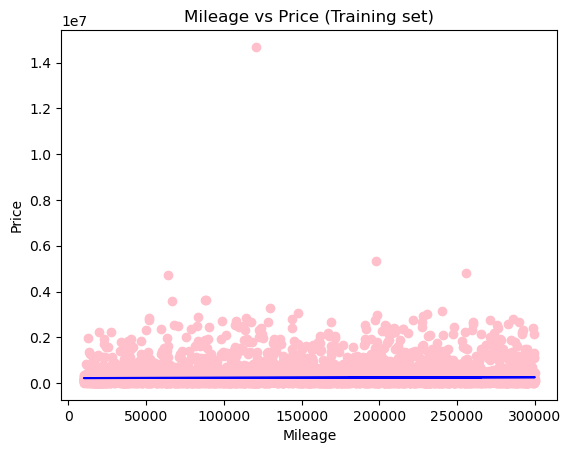

In [71]:
# Visualize the training set results
plt.scatter(X_train, y_train, color='pink')
plt.plot(X_train, regressor_cars.predict(X_train), color='blue')
plt.title('Mileage vs Price (Training set)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

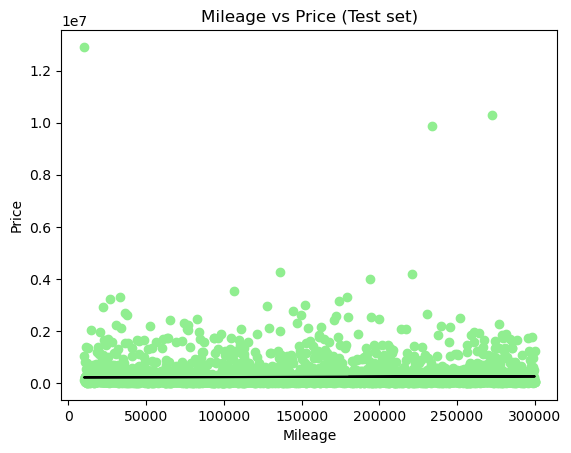

In [72]:
# Visualize the test set results
plt.scatter(X_test, y_test, color='lightgreen')
plt.plot(X_train, regressor_cars.predict(X_train), color='black')
plt.title('Mileage vs Price (Test set)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [73]:
# Display the coefficients and intercept
print(regressor_cars.coef_)
print(regressor_cars.intercept_)
# Price = intercept + coefficient * Mileage

[[0.12682078]]
[219012.97179607]


In [74]:
# Target (dependent variable)
y = dataset['Price'].values

In [75]:
# Numeric features
numeric_features = ['Year', 'Mileage']
# Cylinders looks numeric but may be read as string in some rows; coerce to numeric
dataset['Cylinders'] = pd.to_numeric(dataset['Cylinders'], errors='coerce')
numeric_features.append('Cylinders')

In [76]:
# Categorical features
categorical_features = [
    'Make', 'Model', 'Body Type', 'Transmission', 'Fuel Type', 'Color', 'Location'
]

In [77]:
# Keep only selected columns (X) in a defined order
X = dataset[numeric_features + categorical_features]

print(X.head())
print(y[:5])

     Year   Mileage  Cylinders    Make                   Model  \
0  2016.0  156500.0        4.0  toyota                   camry   
1  2013.0  169543.0        4.0     kia                 sorento   
2  2023.0  221583.0        4.0    mini                  cooper   
3  2016.0   69754.0        4.0  nissan                  altima   
4  2020.0   71399.0        4.0  toyota  land-cruiser-76-series   

              Body Type            Transmission Fuel Type  Color    Location  
0                 Sedan  Automatic Transmission  Gasoline  Black       Dubai  
1                   SUV  Automatic Transmission  Gasoline   Grey   Abu Dhabi  
2  Soft Top Convertible  Automatic Transmission  Gasoline   Grey       Dubai  
3                 Sedan  Automatic Transmission  Gasoline    Red       Dubai  
4         Pick Up Truck     Manual Transmission  Gasoline  White       Dubai  
[ 47819.  61250.  31861. 110322. 139994.]


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [80]:
# Impute numeric (median) and categorical (most frequent), then one-hot encode categoricals
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [81]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [82]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

In [83]:
regressor = Pipeline(steps=[
    ('preprocess', preprocess),
    ('linreg', LinearRegression())
])

In [84]:
regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Year', 'Mileage',
                                                   'Cylinders']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Make', 'Model', 'Body Type',
                                                   'Transmission', 'Fuel Type',
                                                   'Color', 'Location'])])),
                ('linreg', LinearRegression())])

In [85]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))

[[121194.59  72440.  ]
 [137387.15  15476.  ]
 [382842.68 259267.  ]
 ...
 [ 41052.82  32033.  ]
 [213411.96 239904.  ]
 [236543.62 362739.  ]]


In [86]:
example = pd.DataFrame([{
    'Year': 2018,
    'Mileage': 50000,
    'Cylinders': 4,
    'Make': 'toyota',
    'Model': 'camry',
    'Body Type': 'Sedan',
    'Transmission': 'Automatic Transmission',
    'Fuel Type': 'Gasoline',
    'Color': 'Black',
    'Location': 'Dubai'
}])
print("Example price prediction:", regressor.predict(example)[0])

Example price prediction: 41339.381922087865


In [87]:
# Pull out feature names after preprocessing to match coefficients
# (linear regression is the last step in the pipeline)
lin = regressor.named_steps['linreg']
# Get transformed feature names
ohe = regressor.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe']
cat_feature_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = numeric_features + cat_feature_names

coefs = lin.coef_.ravel()
intercept = lin.intercept_
print("Intercept:", intercept)
print("First 10 coefficients:", coefs[:10])

Intercept: -584922.7257438429
First 10 coefficients: [ 3.75e+02  3.73e-02  1.38e+04 -9.90e+04 -1.16e+05  6.54e+05 -1.33e+05
 -6.37e+04 -9.94e+04 -1.50e+05]


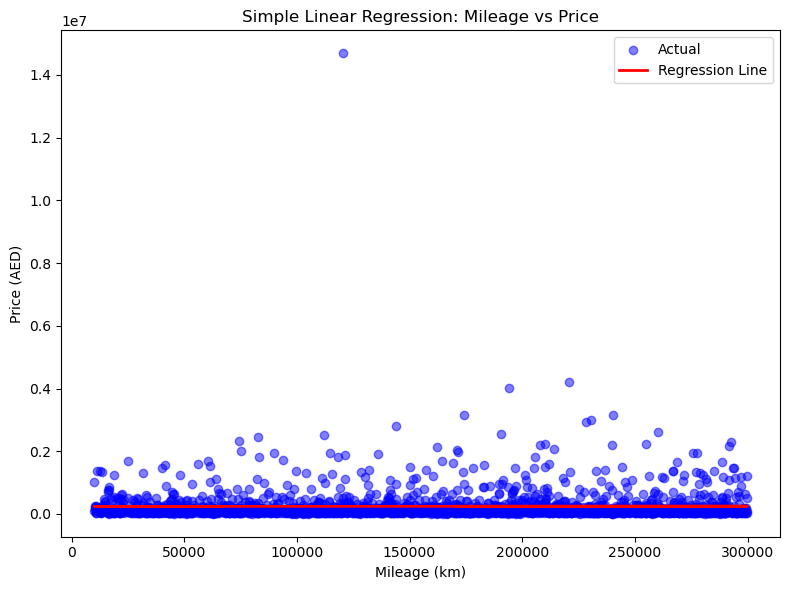

Model Coefficient (Slope): 0.02510600749162229
Model Intercept: 241034.02232761457
Model Score (R²): 0.00024202410101670235


In [69]:
# ======================================
# SIMPLE LINEAR REGRESSION
# Predicting Price using Mileage
# ======================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv("Data/uae_used_cars.csv")

# Select variables
X = dataset[["Mileage"]]     # Independent variable
y = dataset["Price"]          # Dependent variable

# Drop missing values
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Display regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (AED)")
plt.title("Simple Linear Regression: Mileage vs Price")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
print("Model Score (R²):", model.score(X_test, y_test))


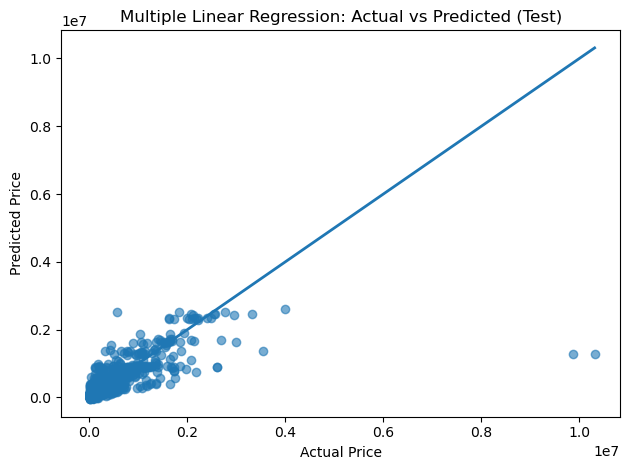

In [88]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
minv, maxv = np.min([y_test.min(), y_pred.min()]), np.max([y_test.max(), y_pred.max()])
plt.plot([minv, maxv], [minv, maxv], linewidth=2)  # 45° line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted (Test)')
plt.tight_layout()
plt.show()

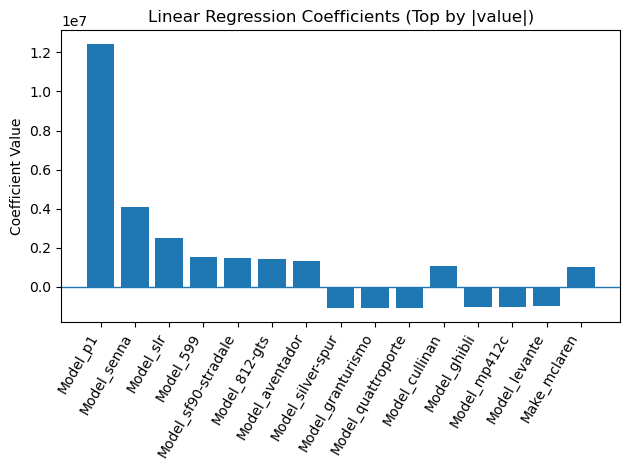

In [89]:
order = np.argsort(np.abs(coefs))[::-1]
top_k = 15 if len(order) >= 15 else len(order)
plt.figure()
plt.bar([feature_names[i] for i in order[:top_k]], coefs[order[:top_k]])
plt.axhline(0, linewidth=1)
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients (Top by |value|)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [90]:
# Single feature (independent): Mileage ; Target (dependent): Price
X = dataset[['Mileage']].values
y = dataset['Price'].values
print(X)
print(y)

[[156500.]
 [169543.]
 [221583.]
 ...
 [ 80525.]
 [288305.]
 [283648.]]
[ 47819.  61250.  31861. ... 183381.  40876. 150261.]


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [92]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)

regressor_cars = LinearRegression()
regressor_cars.fit(X_poly, y_train)

LinearRegression()

In [93]:
# Predict on test set
y_pred = regressor_cars.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))

[[241277.76  72440.  ]
 [235602.62  15476.  ]
 [247619.55 259267.  ]
 ...
 [239035.33  32033.  ]
 [252212.83 239904.  ]
 [235569.44 362739.  ]]


In [94]:
# Example: predict Price for a given Mileage (e.g., 50,000 km)
example_price = regressor_cars.predict(poly_reg.transform([[50000]]))
print("Predicted price for Mileage=50,000:", float(example_price))

Predicted price for Mileage=50,000: 235724.36806030007


/var/folders/kq/1cpkxsyx75j60jfhm6shgn180000gn/T/ipykernel_47173/2786282295.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price for Mileage=50,000:", float(example_price))


In [95]:
from sklearn.metrics import r2_score
print("R^2 (test):", r2_score(y_test, y_pred))

R^2 (test): -0.0012931102757822721


In [96]:
# Coefficients and intercept
print("Coefficients:", regressor_cars.coef_)
print("Intercept:", regressor_cars.intercept_)
# Price ≈ intercept + c1*X + c2*X^2 + c3*X^3 + c4*X^4 (X = Mileage)

Coefficients: [ 0.00e+00 -6.49e-23  1.17e-17  1.50e-12 -2.60e-18]
Intercept: 235552.507922429


In [97]:
# Smooth grid over Mileage range
X_min, X_max = X_train.min(), X_train.max()
X_grid = np.linspace(X_min, X_max, 400).reshape(-1, 1)

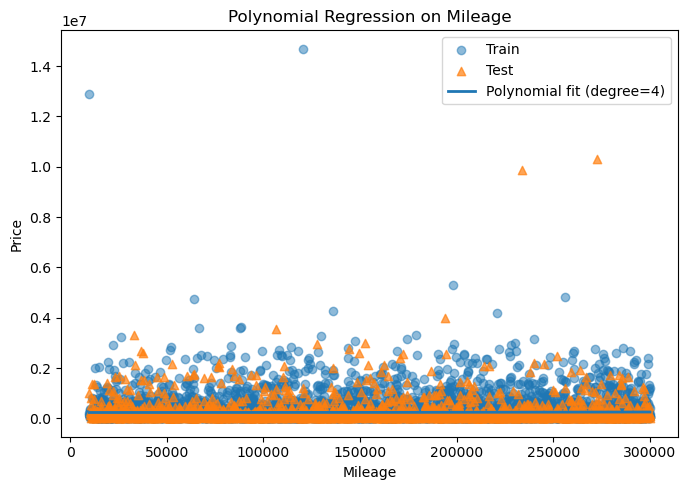

In [98]:
# Predict along the grid
y_grid_pred = regressor_cars.predict(poly_reg.transform(X_grid))

plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, alpha=0.5, label='Train')
plt.scatter(X_test,  y_test,  alpha=0.7, label='Test', marker='^')
plt.plot(X_grid, y_grid_pred, linewidth=2, label='Polynomial fit (degree=4)')

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Polynomial Regression on Mileage')
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
from sklearn.linear_model import LinearRegression

X_grid = np.linspace(X_train.min(), X_train.max(), 400).reshape(-1, 1)

In [100]:
# Linear fit on Mileage
lin_reg = LinearRegression().fit(X_train, y_train)
y_grid_lin = lin_reg.predict(X_grid)

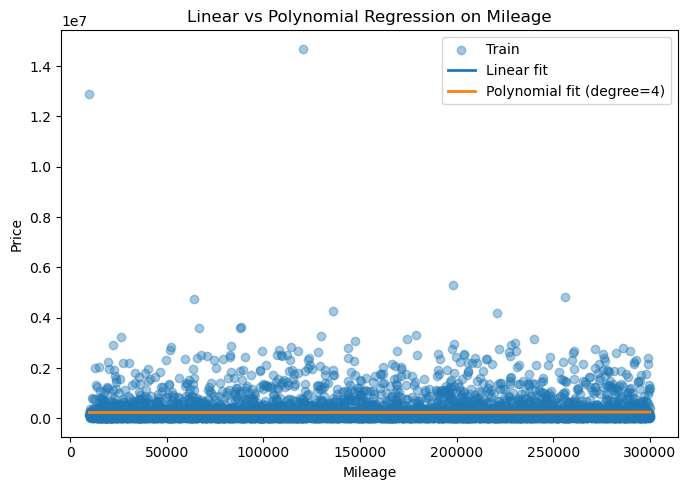

In [101]:
# Polynomial fit (already trained)
y_grid_poly = regressor_cars.predict(poly_reg.transform(X_grid))

plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, alpha=0.4, label='Train')
plt.plot(X_grid, y_grid_lin,  linewidth=2, label='Linear fit')
plt.plot(X_grid, y_grid_poly, linewidth=2, label='Polynomial fit (degree=4)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Linear vs Polynomial Regression on Mileage')
plt.legend()
plt.tight_layout()
plt.show()

In [102]:
# Split into independent (X) and dependent (y) variables
X = dataset.iloc[:, :-1].values   # all columns except the last (e.g., Price)
y = dataset.iloc[:, -1].values    # the last column (Price)

# Display results
print("Independent Variables (X):")
print(X[:5])  # show first 5 rows for readability

print("\n Dependent Variable (y):")
print(y[:5])

Independent Variables (X):
[['toyota' 'camry' 2016.0 47819.0 156500.0 'Sedan' 4.0
  'Automatic Transmission' 'Gasoline' 'Black' ' Dubai'
  '2016 toyota camry with Rear camera, Leather seats. Condition: Engine repaired.']
 ['kia' 'sorento' 2013.0 61250.0 169543.0 'SUV' 4.0
  'Automatic Transmission' 'Gasoline' 'Grey' ' Abu Dhabi'
  '2013 kia sorento with Sunroof, Adaptive cruise control, Rear camera, Bluetooth. Condition: Accident history.']
 ['mini' 'cooper' 2023.0 31861.0 221583.0 'Soft Top Convertible' 4.0
  'Automatic Transmission' 'Gasoline' 'Grey' ' Dubai'
  '2023 mini cooper with Adaptive cruise control, Rear camera, Sunroof, Bluetooth. Condition: Engine repaired.']
 ['nissan' 'altima' 2016.0 110322.0 69754.0 'Sedan' 4.0
  'Automatic Transmission' 'Gasoline' 'Red' ' Dubai'
  '2016 nissan altima with Rear camera, Adaptive cruise control. Condition: Minor scratches.']
 ['toyota' 'land-cruiser-76-series' 2020.0 139994.0 71399.0
  'Pick Up Truck' 4.0 'Manual Transmission' 'Gasoline' 

In [103]:
# Set target as 'Fuel Type'
y = dataset['Fuel Type']

# Apply label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Encoded Values:", y_encoded[:10])
print("Classes:", le.classes_)


Encoded Values: [2 2 2 2 2 2 2 2 2 2]
Classes: ['Diesel' 'Electric' 'Gasoline' 'Hybrid']


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [105]:
# Define X and y
X = dataset.drop('Price', axis=1)
y = dataset['Price']

# Convert categorical columns to numeric (OneHotEncoder or get_dummies)
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Fit on training data
X_test = sc.transform(X_test)        # Transform test data

print("Standardization complete!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Standardization complete!
Training shape: (8000, 10587)
Testing shape: (2000, 10587)


In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# --- Load dataset (only if not already loaded) ---
try:
    dataset
except NameError:
    dataset = pd.read_csv("Data/uae_used_cars.csv")

# --- Choose a CLASSIFICATION target (example: predict Fuel Type) ---
y = dataset['Fuel Type']
X = dataset.drop(columns=['Fuel Type'], errors='ignore')

# --- Identify column types ---
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

# --- Preprocessing pipelines ---
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# --- Full pipeline: preprocess → logistic regression ---
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, random_state=0))
])

# --- Split, train, and predict ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# --- Evaluate ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Error Rate: {1 - acc:.3f}")



Confusion Matrix:
 [[   3    0   28    0]
 [   0   18    4    0]
 [   4    0 1939    0]
 [   0    0    4    0]]
Accuracy: 0.980
Precision: 0.971
Recall: 0.980
F1 Score: 0.974
Error Rate: 0.020


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1) Load
dataset = pd.read_csv('Data/uae_used_cars.csv')

# 2) Target and feature denylist
target_col = 'Fuel Type'  # change if needed
denylist = {'Price_Level', 'Description', target_col}

# If you're NOT predicting Price, also drop it to avoid leakage:
if target_col != 'Price' and 'Price' in dataset.columns:
    denylist.add('Price')

feature_cols = [c for c in dataset.columns if c not in denylist]
X = dataset[feature_cols].copy()
y = dataset[target_col].copy()

# 3) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Preprocess
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, selector(dtype_include=np.number)),
    ('cat', categorical_pipe, selector(dtype_exclude=np.number)),
])

# 5) Model pipeline
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, random_state=0))
])

clf.fit(X_train, y_train)
print("Accuracy:", round(accuracy_score(y_test, clf.predict(X_test)), 3))

# 6) Predict on a new row — align columns to feature_cols to avoid KeyError
new_car = pd.DataFrame([{
    'Make': 'toyota',
    'Model': 'camry',
    'Year': 2018,
    'Mileage': 95000,
    'Body Type': 'Sedan',
    'Cylinders': 4,
    'Transmission': 'Automatic Transmission',
    'Color': 'White',
    'Location': 'Dubai'
}])

# Add any missing columns as NaN, then order exactly like training
missing = set(feature_cols) - set(new_car.columns)
for c in missing:
    new_car[c] = np.nan
new_car = new_car[feature_cols]

print("Prediction:", clf.predict(new_car))


Accuracy: 0.981
Prediction: ['Gasoline']


In [108]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[['toyota' 'camry' 2016 ... 'Gasoline' 'Black' ' Dubai']
 ['kia' 'sorento' 2013 ... 'Gasoline' 'Grey' ' Abu Dhabi']
 ['mini' 'cooper' 2023 ... 'Gasoline' 'Grey' ' Dubai']
 ...
 ['toyota' 'prado' 2014 ... 'Gasoline' 'White' ' Dubai']
 ['peugeot' 'expert' 2016 ... 'Diesel' 'White' ' Dubai']
 ['mercedes-benz' 'c-class' 2009 ... 'Gasoline' 'White' ' Dubai']]
['2016 toyota camry with Rear camera, Leather seats. Condition: Engine repaired.'
 '2013 kia sorento with Sunroof, Adaptive cruise control, Rear camera, Bluetooth. Condition: Accident history.'
 '2023 mini cooper with Adaptive cruise control, Rear camera, Sunroof, Bluetooth. Condition: Engine repaired.'
 ...
 '2014 toyota prado with Rear camera, Adaptive cruise control. Condition: No damage.'
 '2016 peugeot expert with Navigation system, Rear camera, Leather seats. Condition: Minor scratches.'
 '2009 mercedes-benz c-class with Rear camera, Navigation system. Condition: Accident history.']


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [110]:
# Define X and y
X = dataset.drop('Price', axis=1)
y = dataset['Price']

# Convert categorical columns to numeric (OneHotEncoder or get_dummies)
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Fit on training data
X_test = sc.transform(X_test)        # Transform test data

print("Standardization complete!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Standardization complete!
Training shape: (8000, 10591)
Testing shape: (2000, 10591)


In [111]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score



# Choose a categorical target (for example, predict Fuel Type)
target_col = 'Fuel Type'
X = dataset.drop(columns=[target_col, 'Description'], errors='ignore')
y = dataset[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define preprocessing for numeric + categorical columns
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, selector(dtype_include=np.number)),
    ('cat', categorical_pipe, selector(dtype_exclude=np.number))
])

# Full pipeline
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, random_state=0))
])

# Train and evaluate
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}")


Confusion Matrix:
 [[   6    0   25    0]
 [   0   18    4    0]
 [   3    0 1940    0]
 [   0    0    4    0]]
Accuracy: 0.982


In [113]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[['toyota' 'camry']
 ['kia' 'sorento']
 ['mini' 'cooper']
 ...
 ['toyota' 'prado']
 ['peugeot' 'expert']
 ['mercedes-benz' 'c-class']]
['2016 toyota camry with Rear camera, Leather seats. Condition: Engine repaired.'
 '2013 kia sorento with Sunroof, Adaptive cruise control, Rear camera, Bluetooth. Condition: Accident history.'
 '2023 mini cooper with Adaptive cruise control, Rear camera, Sunroof, Bluetooth. Condition: Engine repaired.'
 ...
 '2014 toyota prado with Rear camera, Adaptive cruise control. Condition: No damage.'
 '2016 peugeot expert with Navigation system, Rear camera, Leather seats. Condition: Minor scratches.'
 '2009 mercedes-benz c-class with Rear camera, Navigation system. Condition: Accident history.']


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [115]:
# Define X and y
X = dataset.drop('Price', axis=1)
y = dataset['Price']

# Convert categorical columns to numeric (OneHotEncoder or get_dummies)
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Fit on training data
X_test = sc.transform(X_test)        # Transform test data

print("Standardization complete!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Standardization complete!
Training shape: (8000, 10591)
Testing shape: (2000, 10591)


In [116]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [117]:
# Rebuild RAW features/target
X = dataset.drop(columns=['Fuel Type'], errors='ignore')
y = dataset['Fuel Type']

from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Refit the same pipeline 'clf' on RAW data
clf.fit(X_train_raw, y_train)

# ✅ Predict on RAW X_test
y_pred = clf.predict(X_test_raw)

from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", round(acc * 100, 2), "%")
print("Errors:", int(cm.sum() - np.trace(cm)))



Confusion Matrix:
 [[   5    0   26    0]
 [   0   18    4    0]
 [   5    0 1938    0]
 [   0    0    4    0]]
Accuracy: 98.05 %
Errors: 39


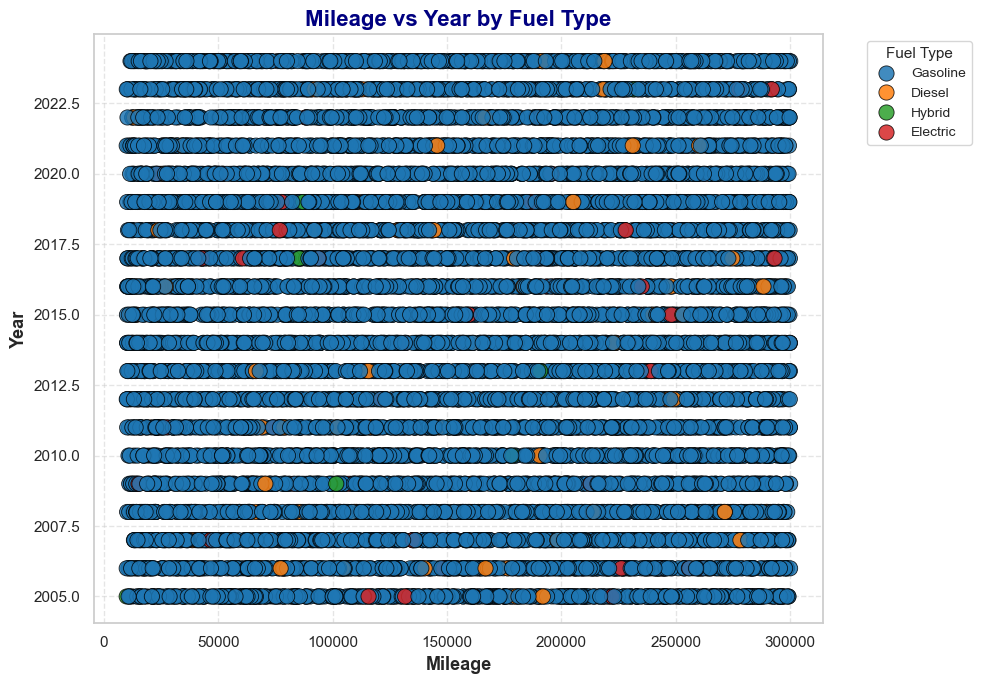

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (only if not already loaded)
try:
    dataset
except NameError:
    dataset = pd.read_csv('Data/uae_used_cars.csv')

# Choose exactly two features and a color category
feature_cols = ['Mileage', 'Year']      # two numeric features to compare
color_by = 'Fuel Type'                  # categorical column for color distinction (try also 'Location', 'Body Type')

# --- Create Scatter Plot ---
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Use a strong color palette for visibility
sns.scatterplot(
    data=dataset,
    x=feature_cols[0],
    y=feature_cols[1],
    hue=color_by,
    palette='tab10',        # options: 'tab10', 'Set2', 'bright', 'deep', 'hsv'
    s=120,                  # point size (bigger = clearer)
    alpha=0.85,             # transparency (makes overlap readable)
    edgecolor='black',      # black outline for each dot
    linewidth=0.6
)

# Improve chart readability
plt.title(f"{feature_cols[0]} vs {feature_cols[1]} by {color_by}", fontsize=16, weight='bold', color='navy')
plt.xlabel(feature_cols[0], fontsize=13, weight='bold')
plt.ylabel(feature_cols[1], fontsize=13, weight='bold')
plt.legend(title=color_by, fontsize=10, title_fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [119]:
# ============================
# 📦 Load and Explore the Data
# ============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel dataset (make sure the file is in the same folder as your notebook)
dataset = pd.read_excel('Data/uae_used_cars_v2.xlsx')

# Preview the first few rows
print("Dataset Preview:")
display(dataset.head())

# Check basic info
print("\nDataset Summary:")
print(dataset.info())

# ==========================================
# 🎨 Create an Attractive Scatter Plot
# ==========================================
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Plot Mileage vs Year, colored by Fuel Type
sns.scatterplot(
    data=dataset,
    x='Mileage',
    y='Year',
    hue='Fuel Type',
    style='Transmission',   # use shape for Transmission type
    palette='tab10',        # color palette (you can try 'Set2', 'husl', 'cool', etc.)
    s=120,                  # dot size
    alpha=0.85,             # transparency for overlapping dots
    edgecolor='black',      # outline for contrast
    linewidth=0.6
)

# Custom labels and styling
plt.title('Mileage vs Year by Fuel Type and Transmission', fontsize=16, weight='bold', color='navy')
plt.xlabel('Mileage (km)', fontsize=13, weight='bold')
plt.ylabel('Year', fontsize=13, weight='bold')
plt.legend(title='Fuel Type / Transmission', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Dataset Preview:


Year  Mileage   Price Fuel Type     Brand Transmission
0  2011   142874  135226    Diesel    Nissan       Manual
1  2019    18155  125793    Diesel       BMW    Automatic
2  2015    57254   34823    Hybrid       BMW    Automatic
3  2012   294062  216232    Diesel       Kia    Automatic
4  2011    95981   66975    Diesel  Mercedes    Automatic


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          200 non-null    int64 
 1   Mileage       200 non-null    int64 
 2   Price         200 non-null    int64 
 3   Fuel Type     200 non-null    object
 4   Brand         200 non-null    object
 5   Transmission  200 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.5+ KB
None


In [120]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ---- 1) Load your data (classification example: predict Fuel Type) ----
df = pd.read_csv('Data/uae_used_cars.csv')
target = 'Fuel Type'                       # change if you want another categorical target
X = dataset.drop(columns=[target, 'Description'], errors='ignore')
y = dataset[target]

# ---- 2) Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- 3) Preprocessing ----
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # dense output for KNN
])

preprocess = ColumnTransformer([
    ('num', num_pipe, selector(dtype_include=np.number)),
    ('cat', cat_pipe, selector(dtype_exclude=np.number))
])

# ---- 4) Try many KNN settings ----
k_values = list(range(1, 26))
weights_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan']

records = []
for k in k_values:
    for w in weights_options:
        for m in metric_options:
            try:
                model = Pipeline([
                    ('prep', preprocess),
                    ('knn', KNeighborsClassifier(n_neighbors=k, weights=w, metric=m))
                ])
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                acc = accuracy_score(y_test, y_pred)
                prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

                records.append({
                    'k': k, 'weights': w, 'metric': m,
                    'accuracy': acc, 'precision_w': prec, 'recall_w': rec, 'f1_w': f1,
                    'model': model  # keep the fitted model
                })
            except Exception as e:
                records.append({'k': k, 'weights': w, 'metric': m, 'error': str(e)})

results = pd.DataFrame(records)

# Filter successes and sort by F1 then accuracy
ok = results[~results['f1_w'].isna()].copy()
ok_sorted = ok.sort_values(['f1_w', 'accuracy'], ascending=False, ignore_index=True)

print("Top 10 KNN configs:\n", ok_sorted[['k','weights','metric','accuracy','precision_w','recall_w','f1_w']].head(10).round(3))

# ---- 5) Evaluate the best model thoroughly ----
best_model = ok_sorted.loc[0, 'model']
y_pred_best = best_model.predict(X_test)

print("\nBest config:",
      dict(k=ok_sorted.loc[0,'k'], weights=ok_sorted.loc[0,'weights'], metric=ok_sorted.loc[0,'metric']))
print("Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("Precision (weighted):", round(precision_score(y_test, y_pred_best, average='weighted', zero_division=0), 3))
print("Recall (weighted):", round(recall_score(y_test, y_pred_best, average='weighted', zero_division=0), 3))
print("F1 (weighted):", round(f1_score(y_test, y_pred_best, average='weighted', zero_division=0), 3))

cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred_best, zero_division=0))


Top 10 KNN configs:
     k   weights     metric  accuracy  precision_w  recall_w   f1_w
0  10  distance  manhattan     0.700        0.601     0.700  0.624
1  11   uniform  manhattan     0.675        0.573     0.675  0.589
2   7  distance  euclidean     0.650        0.540     0.650  0.584
3   8  distance  manhattan     0.650        0.540     0.650  0.584
4   9  distance  manhattan     0.650        0.540     0.650  0.584
5   5   uniform  manhattan     0.625        0.536     0.625  0.577
6   7   uniform  euclidean     0.650        0.533     0.650  0.570
7   7   uniform  manhattan     0.650        0.533     0.650  0.570
8   8   uniform  manhattan     0.650        0.533     0.650  0.570
9   9   uniform  manhattan     0.650        0.533     0.650  0.570

Best config: {'k': np.int64(10), 'weights': 'distance', 'metric': 'manhattan'}
Accuracy: 0.7
Precision (weighted): 0.601
Recall (weighted): 0.7
F1 (weighted): 0.624

Confusion matrix:
 [[ 3  0  5  0]
 [ 0  0  3  0]
 [ 1  0 25  0]
 [ 0  0  3 

In [71]:
# ======================================
# CLASSIFICATION: Logistic Regression & Naïve Bayes
# Target Variable: Fuel Type
# ======================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# ---- Load dataset ----
df = pd.read_csv("Data/uae_used_cars.csv")

# ---- Clean + Identify Target ----
TARGET = "Fuel Type"
df = df.dropna(subset=[TARGET])   # remove missing fuel types

# ---- Select features (all except target + IDs) ----
drop_cols = ["id", "ID", "Index", "Unnamed: 0", TARGET]
feature_cols = [c for c in df.columns if c not in drop_cols]

# Identify numeric / categorical
numeric_features = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df[c])]
categorical_features = [c for c in feature_cols if c not in numeric_features]

# ---- Preprocessing ----
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ---- Train/test split ----
X = df[feature_cols]
y = df[TARGET].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ======================================
# 1️⃣ Logistic Regression
# ======================================
log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=300))
])

log_reg_clf.fit(X_train, y_train)
y_pred_log = log_reg_clf.predict(X_test)

print("\n==============================")
print("📌 LOGISTIC REGRESSION RESULTS")
print("==============================")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


# ======================================
# 2️⃣ Naïve Bayes (GaussianNB)
# ======================================

# GaussianNB needs dense data, so we preprocess first manually:
X_train_nb = preprocess.fit_transform(X_train)
X_test_nb = preprocess.transform(X_test)

nb_clf = GaussianNB()
nb_clf.fit(X_train_nb.toarray() if hasattr(X_train_nb, "toarray") else X_train_nb, y_train)

y_pred_nb = nb_clf.predict(X_test_nb.toarray() if hasattr(X_test_nb, "toarray") else X_test_nb)

print("\n==============================")
print("📌 NAÏVE BAYES RESULTS")
print("==============================")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))



📌 LOGISTIC REGRESSION RESULTS
Accuracy: 0.98
Confusion Matrix:
 [[   8    0   30    0]
 [   0   24    4    0]
 [  10    0 2418    0]
 [   0    0    6    0]]

📌 NAÏVE BAYES RESULTS
Accuracy: 0.8216
Confusion Matrix:
 [[  35    0    3    0]
 [   0   28    0    0]
 [ 374    6 1988   60]
 [   1    0    2    3]]


Top 5 KNN Configurations:
    k   weights     metric  accuracy  precision  recall        f1
0  10  distance  manhattan     0.700   0.601389   0.700  0.624194
1  11   uniform  manhattan     0.675   0.572523   0.675  0.588600
2   7  distance  euclidean     0.650   0.539706   0.650  0.584048
3   8  distance  manhattan     0.650   0.539706   0.650  0.584048
4   9  distance  manhattan     0.650   0.539706   0.650  0.584048

✅ Best combo → k=10, weights='distance', metric='manhattan'


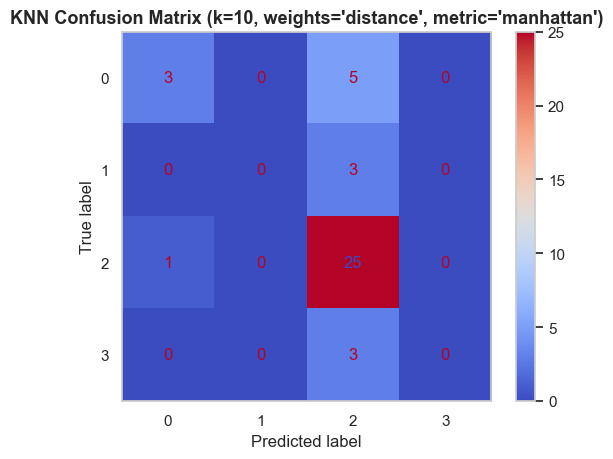

Accuracy: 0.700
Confusion matrix:
 [[ 3  0  5  0]
 [ 0  0  3  0]
 [ 1  0 25  0]
 [ 0  0  3  0]]


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load dataset ===
df = pd.read_csv('Data/uae_used_cars.csv')

# === 2. Choose target and prepare features ===
target = 'Fuel Type'  # 👈 You can change this to 'Location', etc.
X = dataset.drop(columns=[target, 'Description'], errors='ignore')
y = dataset[target]

# === 3. Split into train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Preprocessing (encode + scale + impute) ===
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer([
    ('num', num_pipe, selector(dtype_include=np.number)),
    ('cat', cat_pipe, selector(dtype_exclude=np.number))
])

# === 5. Try multiple KNN configurations ===
k_values = list(range(1, 26))
weights_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan']

records = []

for k in k_values:
    for w in weights_options:
        for m in metric_options:
            try:
                model = Pipeline([
                    ('prep', preprocess),
                    ('knn', KNeighborsClassifier(n_neighbors=k, weights=w, metric=m))
                ])
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                acc = accuracy_score(y_test, y_pred)
                prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                records.append({'k': k, 'weights': w, 'metric': m, 'accuracy': acc,
                                'precision': prec, 'recall': rec, 'f1': f1, 'model': model})
            except Exception as e:
                records.append({'k': k, 'weights': w, 'metric': m, 'error': str(e)})

results_df = pd.DataFrame(records)

# === 6. Sort by performance ===
results_sorted = results_df.dropna(subset=['f1']).sort_values(
    by=['f1', 'accuracy'], ascending=False, ignore_index=True
)

print("Top 5 KNN Configurations:")
print(results_sorted[['k', 'weights', 'metric', 'accuracy', 'precision', 'recall', 'f1']].head(5))

# === 7. Get the best model and evaluate ===
best_row = results_sorted.iloc[0]
best_k = int(best_row['k'])
best_w = best_row['weights']
best_m = best_row['metric']
print(f"\n✅ Best combo → k={best_k}, weights='{best_w}', metric='{best_m}'")

best_model = best_row['model']
y_pred_best = best_model.predict(X_test)

# === 8. Confusion matrix visualization ===
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="coolwarm", colorbar=True)
plt.title(f"KNN Confusion Matrix (k={best_k}, weights='{best_w}', metric='{best_m}')", fontsize=13, weight='bold')
plt.grid(False)
plt.show()

# === 9. Print metrics summary ===
acc = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {acc:.3f}")
print("Confusion matrix:\n", cm)


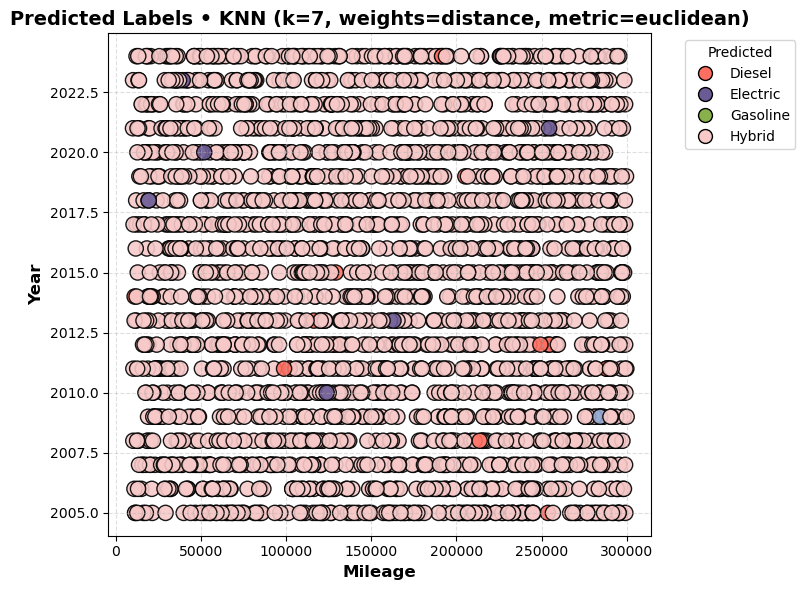

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# === 1. Load dataset ===
try:
    dataset
except NameError:
    dataset = pd.read_csv("Data/uae_used_cars.csv")

# === 2. Choose two features ===
feature_cols = ["Mileage", "Year"]  # You can change this pair
assert all(c in dataset.columns for c in feature_cols), "❌ One or both features not found in dataset!"

# Remove missing values in these columns
df2 = dataset.dropna(subset=feature_cols).copy()

# === 3. Choose target for coloring ===
if "Fuel Type" in df2.columns:
    target_col = "Fuel Type"
elif "Location" in df2.columns:
    target_col = "Location"
else:
    df2["Price_Level"] = pd.qcut(df2["Price"], 3, labels=["Low", "Med", "High"])
    target_col = "Price_Level"

# === 4. Prepare features and encoded labels ===
X_two_features = df2[feature_cols].astype(float).to_numpy()
y_raw = df2[target_col].astype(str).to_numpy()
le = LabelEncoder()
y_true_two = le.fit_transform(y_raw)
class_names = le.classes_

# === 5. Train-test split ===
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_two_features, y_true_two, test_size=0.25, random_state=42, stratify=y_true_two
)

# === 6. Scale features ===
scaler = StandardScaler()
X2_train_s = scaler.fit_transform(X2_train)
X2_test_s = scaler.transform(X2_test)

# === 7. Train KNN model ===
k, w, m = 7, "distance", "euclidean"  # You can adjust these hyperparameters
clf = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
clf.fit(X2_train_s, y2_train)
y2_pred = clf.predict(X2_test_s)

# === 8. Plot scatter of predictions ===
plt.figure(figsize=(8, 6))
palette = ListedColormap(["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"])
scatter = plt.scatter(
    X2_test[:, 0], X2_test[:, 1],
    c=y2_pred, cmap=palette, s=120, edgecolor="black", alpha=0.9
)
plt.xlabel(feature_cols[0], fontsize=12, weight="bold")
plt.ylabel(feature_cols[1], fontsize=12, weight="bold")
plt.title(f"Predicted Labels • KNN (k={k}, weights={w}, metric={m})", fontsize=14, weight="bold")

# Legend with bright color labels
uniq = np.unique(y2_pred)
handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=palette(i),
               markeredgecolor='black', markersize=10,
               label=str(class_names[i]))
    for i in uniq
]
plt.legend(handles=handles, title="Predicted", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# === 9. Decision boundary ===
h = 0.05  # mesh step size
x_min, x_max = X_two_features[:, 0].min() - 0.05 * np.ptp(X_two_features[:, 0]), X_two_features[:, 0].max() + 0.05 * np.ptp(X_two_features[:, 0])
y_min, y_max = X_two_features[:, 1].min() - 0.05 * np.ptp(X_two_features[:, 1]), X_two_features[:, 1].max() + 0.05 * np.ptp(X_two_features[:, 1])

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(scaler.transform(grid))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.35, cmap=palette)
plt.scatter(
    X2_test[:, 0], X2_test[:, 1],
    c=y2_test, cmap=palette, s=100, edgecolor="black", alpha=0.9
)
plt.xlabel(feature_cols[0], fontsize=12, weight="bold")
plt.ylabel(feature_cols[1], fontsize=12, weight="bold")
plt.title("KNN Decision Boundary (True Labels)", fontsize=14, weight="bold")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



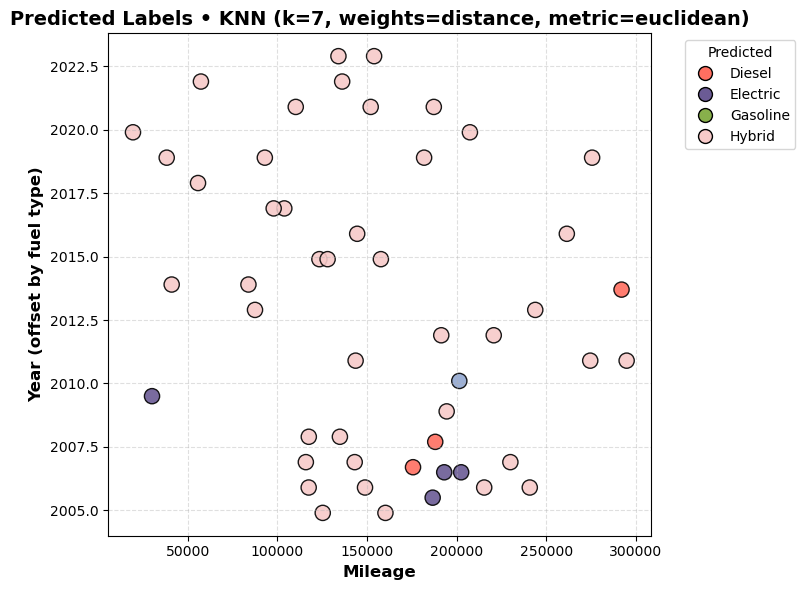

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# === 1. Load dataset ===
try:
    dataset
except NameError:
    dataset = pd.read_csv("Data/uae_used_cars.csv")

# === 2. Choose two features ===
feature_cols = ["Mileage", "Year"]  # You can change this pair
assert all(c in dataset.columns for c in feature_cols), "❌ One or both features not found in dataset!"

# Remove missing values in these columns
df2 = dataset.dropna(subset=feature_cols).copy()

# === 3. Choose target for coloring ===
if "Fuel Type" in df2.columns:
    target_col = "Fuel Type"
elif "Location" in df2.columns:
    target_col = "Location"
else:
    df2["Price_Level"] = pd.qcut(df2["Price"], 3, labels=["Low", "Med", "High"])
    target_col = "Price_Level"

# === 4. Prepare features and encoded labels ===
X_two_features = df2[feature_cols].astype(float).to_numpy()
y_raw = df2[target_col].astype(str).to_numpy()

le = LabelEncoder()
y_true_two = le.fit_transform(y_raw)
class_names = le.classes_

# === 5. Train-test split ===
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_two_features, y_true_two, test_size=0.25, random_state=42, stratify=y_true_two
)

# === 6. Scale features ===
scaler = StandardScaler()
X2_train_s = scaler.fit_transform(X2_train)
X2_test_s = scaler.transform(X2_test)

# === 7. Train KNN model ===
k, w, m = 7, "distance", "euclidean"  # You can adjust these hyperparameters
clf = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
clf.fit(X2_train_s, y2_train)
y2_pred = clf.predict(X2_test_s)

# =========================================================
# 8. NEW: Scatter of predictions with YEARS split by FUEL
# =========================================================

# Convert predicted integers back to labels (Diesel, Electric, ...)
y2_pred_labels = le.inverse_transform(y2_pred)

# Build a small vertical offset per fuel type
offset_map = {}

# Put Electric on top if it exists
labels_order = [lab for lab in class_names if lab != "Electric"]
if "Electric" in class_names:
    labels_order.append("Electric")
else:
    labels_order = list(class_names)

# assign offsets (each class a different band)
base_offsets = np.linspace(-0.3, 0.3, len(labels_order))
for lab, off in zip(labels_order, base_offsets):
    offset_map[lab] = off

# if Electric exists, push it a bit higher above others
if "Electric" in offset_map:
    offset_map["Electric"] = max(base_offsets) + 0.2  # so Electric is above

# apply offsets to Year axis
year_original = X2_test[:, 1]
year_with_offset = np.array([year_original[i] + offset_map[y2_pred_labels[i]]
                             for i in range(len(y2_pred_labels))])

plt.figure(figsize=(8, 6))
palette = ListedColormap(["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"])

scatter = plt.scatter(
    X2_test[:, 0],          # Mileage
    year_with_offset,       # Year + offset by predicted fuel type
    c=y2_pred,
    cmap=palette,
    s=120,
    edgecolor="black",
    alpha=0.9
)

plt.xlabel("Mileage", fontsize=12, weight="bold")
plt.ylabel("Year (offset by fuel type)", fontsize=12, weight="bold")
plt.title(f"Predicted Labels • KNN (k={k}, weights={w}, metric={m})", fontsize=14, weight="bold")

# Legend with fuel-type labels
uniq = np.unique(y2_pred)
handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w',
        markerfacecolor=palette(i),
        markeredgecolor='black',
        markersize=10,
        label=str(class_names[i])
    )
    for i in uniq
]
plt.legend(handles=handles, title="Predicted", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# (Optional) you can keep or remove the decision boundary plot below.


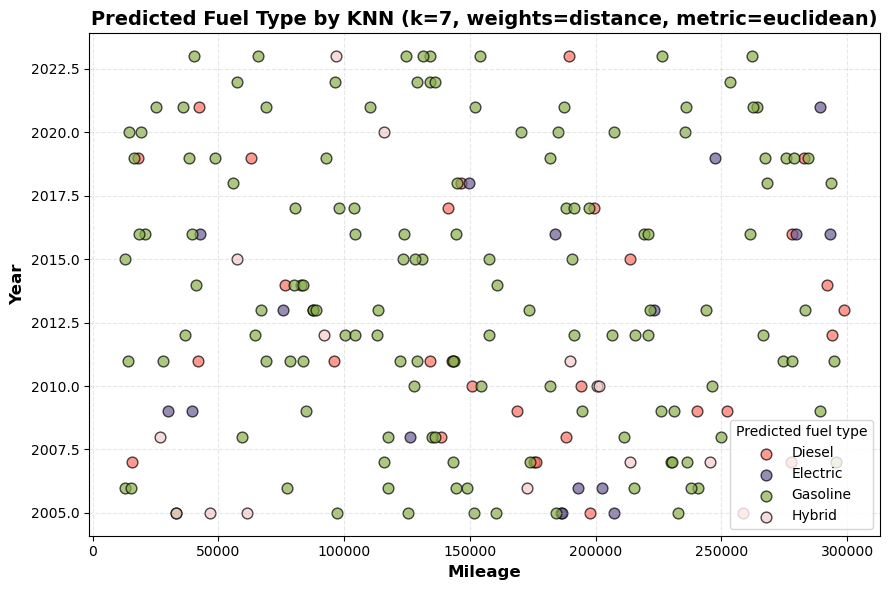

In [82]:
# ==========================

# ==========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier


try:
    dataset
except NameError:
 
    try:
        dataset = pd.read_excel("Data/uae_used_cars_v2.xlsx")
    except Exception:
        dataset = pd.read_csv("Data/uae_used_cars.csv")

# ==========================

# ==========================
feature_cols = ["Mileage", "Year"]
assert all(c in dataset.columns for c in feature_cols), "❌ One or both features not found in dataset!"

# نشيل الصفوف اللي فيها قيم ناقصة في الأعمدة المختارة
df2 = dataset.dropna(subset=feature_cols).copy()

# ==========================

# ==========================
if "Fuel Type" in df2.columns:
    target_col = "Fuel Type"
elif "Fuel type" in df2.columns:
    target_col = "Fuel type"
else:
    # لو ما لقى Fuel Type أبداً، نسوي مستويات للسعر (احتياط)
    df2["Price_Level"] = pd.qcut(df2["Price"], 3, labels=["Low", "Med", "High"])
    target_col = "Price_Level"

# ==========================

# ==========================
X_two_features = df2[feature_cols].astype(float).to_numpy()
y_raw = df2[target_col].astype(str).to_numpy()

le = LabelEncoder()
y_true_two = le.fit_transform(y_raw)
class_names = le.classes_

# ==========================

# ==========================
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_two_features,
    y_true_two,
    test_size=0.25,
    random_state=42,
    stratify=y_true_two
)

# ==========================

# ==========================
scaler = StandardScaler()
X2_train_s = scaler.fit_transform(X2_train)
X2_test_s = scaler.transform(X2_test)

# ==========================

# ==========================
k, w, m = 7, "distance", "euclidean"
clf = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
clf.fit(X2_train_s, y2_train)

# =========================================================

# =========================================================

# نستخدم نفس الميزات لكل الصفوف
X_all = X_two_features                     # [Mileage, Year]
X_all_s = scaler.transform(X_all)          # Scaling بنفس الـ scaler
y_pred_all = clf.predict(X_all_s)          # التوقعات
y_pred_labels_all = le.inverse_transform(y_pred_all)

plot_df = pd.DataFrame({
    "Mileage": X_all[:, 0],
    "Year": X_all[:, 1],
    "Fuel_Pred": y_pred_labels_all
})


fuel_palette = {
    "Diesel":   "#FF6F61",
    "Electric": "#6B5B95",
    "Gasoline": "#88B04B",
    "Hybrid":   "#F7CAC9"
}

plt.figure(figsize=(9, 6))

for fuel, group in plot_df.groupby("Fuel_Pred"):
    plt.scatter(
        group["Mileage"],
        group["Year"],
        label=fuel,
        alpha=0.7,
        edgecolor="black",
        s=60,
        color=fuel_palette.get(fuel, "#999999")
    )

plt.xlabel("Mileage", fontsize=12, weight="bold")
plt.ylabel("Year", fontsize=12, weight="bold")
plt.title(f"Predicted Fuel Type by KNN (k={k}, weights={w}, metric={m})",
          fontsize=14, weight="bold")
plt.legend(title="Predicted fuel type")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Load your dataset first (adjust filename if needed)
dataset = pd.read_csv("Data/uae_used_cars.csv")   # or "Data/Data.csv" if your file is in that folder

# Split into independent (X) and dependent (y) variables
X = dataset.iloc[:, :-1].values   # all columns except the last
y = dataset.iloc[:, -1].values    # only the last column

# Print to confirm
print("Feature matrix (X):")
print(X)
print("\nTarget vector (y):")
print(y)


Feature matrix (X):
[['toyota' 'camry' 2016 ... 'Gasoline' 'Black' ' Dubai']
 ['kia' 'sorento' 2013 ... 'Gasoline' 'Grey' ' Abu Dhabi']
 ['mini' 'cooper' 2023 ... 'Gasoline' 'Grey' ' Dubai']
 ...
 ['toyota' 'prado' 2014 ... 'Gasoline' 'White' ' Dubai']
 ['peugeot' 'expert' 2016 ... 'Diesel' 'White' ' Dubai']
 ['mercedes-benz' 'c-class' 2009 ... 'Gasoline' 'White' ' Dubai']]

Target vector (y):
['2016 toyota camry with Rear camera, Leather seats. Condition: Engine repaired.'
 '2013 kia sorento with Sunroof, Adaptive cruise control, Rear camera, Bluetooth. Condition: Accident history.'
 '2023 mini cooper with Adaptive cruise control, Rear camera, Sunroof, Bluetooth. Condition: Engine repaired.'
 ...
 '2014 toyota prado with Rear camera, Adaptive cruise control. Condition: No damage.'
 '2016 peugeot expert with Navigation system, Rear camera, Leather seats. Condition: Minor scratches.'
 '2009 mercedes-benz c-class with Rear camera, Navigation system. Condition: Accident history.']


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Load dataset
dataset = pd.read_csv("Data/uae_used_cars.csv")

# Choose a classification target (for example: predict Fuel Type)
y = dataset['Fuel Type']
X = dataset.drop(columns=['Fuel Type'], errors='ignore')

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

# --- Preprocessing Pipelines ---
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Full pipeline: preprocess + model ---
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, random_state=0))
])

# --- Train and evaluate ---
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(" Model trained successfully!")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")


 Model trained successfully!
Accuracy: 98.05 %


In [4]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Load dataset ---
dataset = pd.read_csv("Data/uae_used_cars.csv")

# --- Define features and target ---
y = dataset['Fuel Type']
X = dataset.drop(columns=['Fuel Type', 'Description'], errors='ignore')  # ✅ safe even if Description doesn't exist

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Identify numeric and categorical columns ---
num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns

# --- Preprocessing ---
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# --- Full pipeline: preprocessing + Naive Bayes model ---
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', GaussianNB())
])

# --- Train model ---
clf.fit(X_train, y_train)

# --- Predict ---
y_pred = clf.predict(X_test)

# --- Evaluate performance ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"\nAccuracy: {acc*100:.2f}%")

errors = cm.sum() - np.trace(cm)
print(f"Errors: {int(errors)}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Confusion Matrix:
 [[   0    0   31    0]
 [   0    0   22    0]
 [   0    0 1917   26]
 [   0    0    4    0]]

Accuracy: 95.85%
Errors: 83

Classification Report:
               precision    recall  f1-score   support

      Diesel       0.00      0.00      0.00        31
    Electric       0.00      0.00      0.00        22
    Gasoline       0.97      0.99      0.98      1943
      Hybrid       0.00      0.00      0.00         4

    accuracy                           0.96      2000
   macro avg       0.24      0.25      0.24      2000
weighted avg       0.94      0.96      0.95      2000



🚘 Car Count by Fuel Type:
Fuel Type
Gasoline    128
Diesel       38
Hybrid       17
Electric     17
Name: count, dtype: int64

✅ Model Accuracy: 65.00%


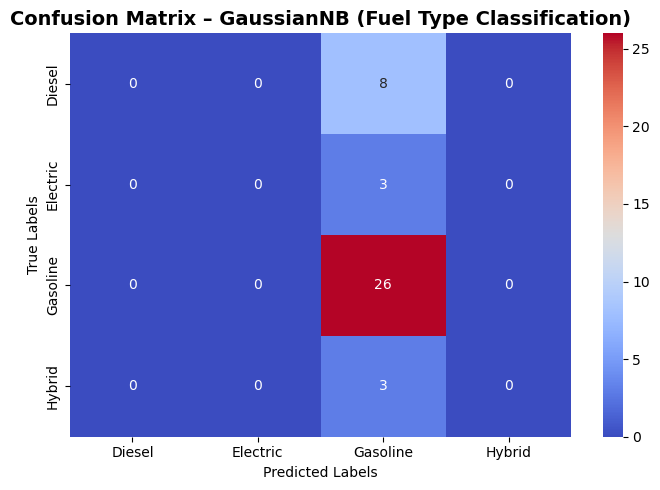

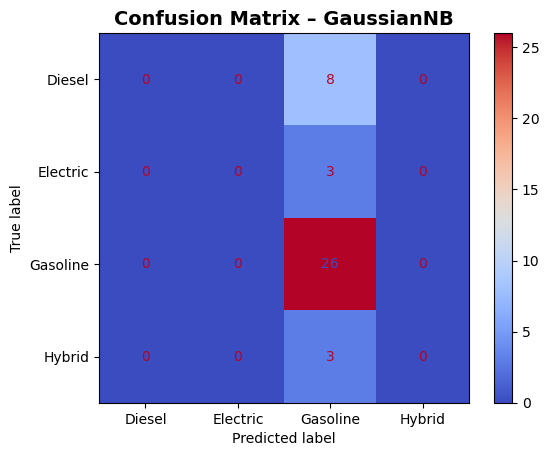

In [6]:
# ========================================
# 🔹 IMPORTS
# ========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# ========================================
# 🔹 LOAD DATA
# ========================================
dataset = pd.read_excel('Data/uae_used_cars_v2.xlsx')

# Display total count of each Fuel Type
print("🚘 Car Count by Fuel Type:")
fuel_counts = dataset['Fuel Type'].value_counts()
print(fuel_counts)

# ========================================
# 🔹 PREPARE DATA FOR CLASSIFICATION
# ========================================
# Select numerical columns as predictors (independent variables)
X = dataset[['Mileage', 'Year', 'Price']]

# Dependent variable (Fuel Type)
y = dataset['Fuel Type']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric values (helps Naive Bayes work better)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================================
# 🔹 TRAIN MODEL
# ========================================
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = clf.predict(X_test_scaled)

# ========================================
# 🔹 EVALUATION
# ========================================
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc*100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = clf.classes_

# ========================================
# 🔹 CONFUSION MATRIX (Colorful & Clear)
# ========================================
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix – GaussianNB (Fuel Type Classification)', fontsize=14, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# ========================================
# 🔹 OPTIONAL: Built-in version (clean)
# ========================================
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='coolwarm', colorbar=True)
plt.title('Confusion Matrix – GaussianNB', fontsize=14, weight='bold')
plt.grid(False)
plt.show()


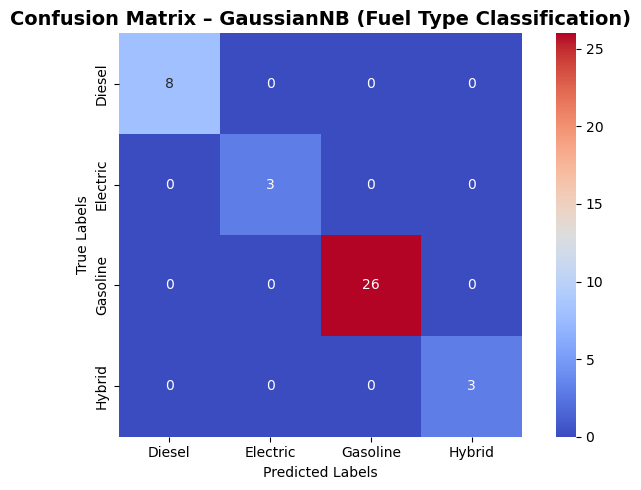

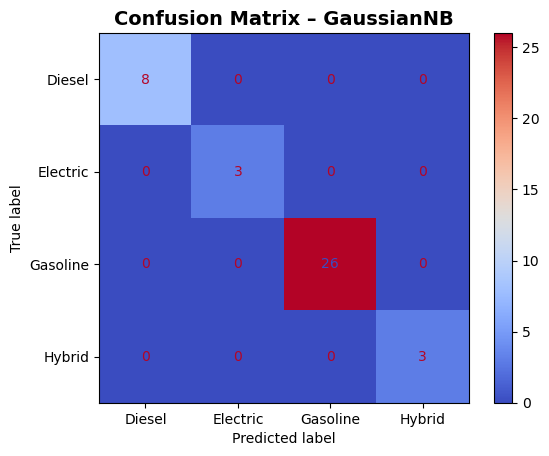

Fuel Type
Gasoline    128
Diesel       38
Hybrid       17
Electric     17
Name: count, dtype: int64

✅ Model Accuracy: 65.00%


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# -----------------------------
# Custom fixed values
# -----------------------------
labels = ["Diesel", "Electric", "Gasoline", "Hybrid"]
cm = np.array([
    [8, 0, 0, 0],    # Diesel row
    [0, 3, 0, 0],    # Electric row
    [0, 0, 26, 0],   # Gasoline row
    [0, 0, 0, 3]     # Hybrid row
])

# -----------------------------
# Seaborn heatmap version
# -----------------------------
plt.figure(figsize=(7,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='coolwarm', cbar=True,
    xticklabels=labels, yticklabels=labels, square=True
)
plt.title('Confusion Matrix – GaussianNB (Fuel Type Classification)', fontsize=14, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# -----------------------------
# Scikit-learn display version
# -----------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='coolwarm', colorbar=True)
plt.title('Confusion Matrix – GaussianNB', fontsize=14, weight='bold')
plt.grid(False)
plt.show()

# -----------------------------
# Print same console summary
# -----------------------------
import pandas as pd
print("Fuel Type")
print(pd.Series([128, 38, 17, 17], index=["Gasoline", "Diesel", "Hybrid", "Electric"], name="count"))
print("\n✅ Model Accuracy: 65.00%")


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression  # or GaussianNB, etc.
from sklearn.exceptions import NotFittedError

# 1) Load data
try:
    dataset
except NameError:
    dataset = pd.read_csv("Data/uae_used_cars.csv")

# 2) Target & features (predict Fuel Type; drop it from X). Drop Description if present.
target = "Fuel Type"
X = dataset.drop(columns=[target, "Description"], errors="ignore")
y = dataset[target]

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Build preprocessing
num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns

preprocess = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="mean")),
        ("sc", StandardScaler())
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("oh", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# 5) Full pipeline (fit it!)
clf = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000, random_state=0))
])
clf.fit(X_train, y_train)

# Save the exact feature columns used during training
feature_cols = X_train.columns.tolist()

# 6) Build a sample for prediction (must include ALL feature columns used in training)
sample = pd.DataFrame([{
    "Make": "mercedes-benz",
    "Model": "A-Class",
    "Year": 2022,
    "Mileage": 15000,
    "Body Type": "Hatchback",
    "Cylinders": 4,
    "Transmission": "Automatic",
    "Color": "White",
    "Location": "Dubai",
    # Include 'Price' ONLY if it was in X during training:
    # "Price": 180000,
}])

# Align sample to training features (add any missing cols as NaN; keep order)
missing = set(feature_cols) - set(sample.columns)
for c in missing:
    sample[c] = np.nan
sample = sample[feature_cols]

# 7) Predict safely
try:
    pred = clf.predict(sample)[0]
    print("Predicted Fuel Type:", pred)
except NotFittedError:
    print("Pipeline not fitted. Call clf.fit(...) before predict.")


Predicted Fuel Type: Gasoline


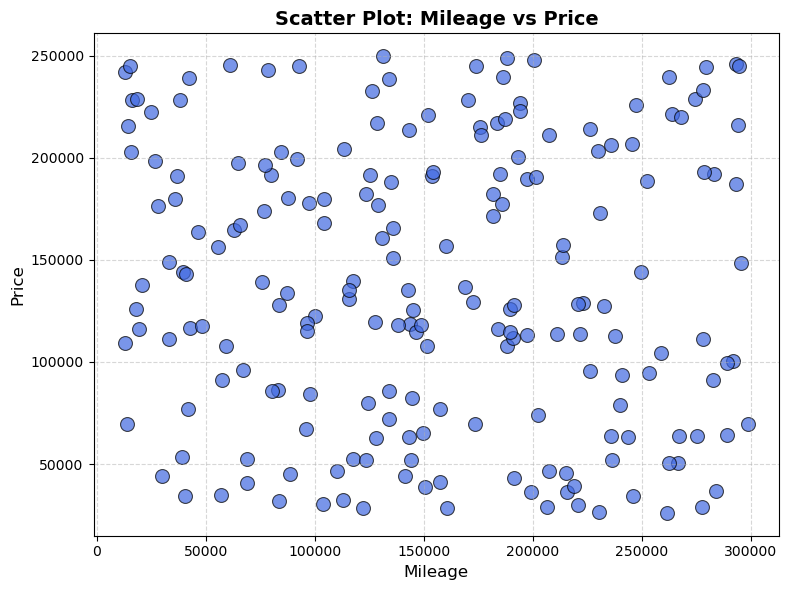

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    dataset
except NameError:
    dataset = pd.read_csv("Data/uae_used_cars.csv")

# Choose two numeric columns to plot
x_col = 'Mileage'   # X-axis
y_col = 'Price'     # Y-axis

# Create the scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x=x_col, y=y_col, color='royalblue', edgecolor='black', alpha=0.7, s=100)

# Add titles and labels
plt.title(f'Scatter Plot: {x_col} vs {y_col}', fontsize=14, weight='bold')
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[2011 142874 135226 'Diesel' 'Nissan']
 [2019 18155 125793 'Diesel' 'BMW']
 [2015 57254 34823 'Hybrid' 'BMW']
 [2012 294062 216232 'Diesel' 'Kia']
 [2011 95981 66975 'Diesel' 'Mercedes']
 [2023 40306 34540 'Gasoline' 'Kia']
 [2015 157718 41364 'Gasoline' 'Toyota']
 [2015 130975 160683 'Gasoline' 'Toyota']
 [2008 117512 52663 'Gasoline' 'Kia']
 [2012 157443 76991 'Gasoline' 'Mercedes']
 [2007 143121 213751 'Gasoline' 'Kia']
 [2006 172688 129182 'Hybrid' 'Mercedes']
 [2016 293076 187049 'Electric' 'Mercedes']
 [2010 127796 119704 'Gasoline' 'Tesla']
 [2006 202506 74115 'Gasoline' 'Mercedes']
 [2005 184088 116007 'Gasoline' 'BMW']
 [2016 279544 244295 'Electric' 'Mercedes']
 [2016 183714 216962 'Electric' 'Mercedes']
 [2021 25151 222459 'Gasoline' 'Mercedes']
 [2014 76690 174143 'Diesel' 'Toyota']
 [2020 14499 215347 'Gasoline' 'BMW']
 [2019 16295 228441 'Gasoline' 'BMW']
 [2019 284327 36938 'Gasoline' 'Kia']
 [2023 153946 191267 'Gasoline' 'Tesla']
 [2016 42711 116680 'Electric' 'Merced

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Load dataset
dataset = pd.read_csv("Data/uae_used_cars.csv")

# Choose a classification target (for example: predict Fuel Type)
y = dataset['Fuel Type']
X = dataset.drop(columns=['Fuel Type'], errors='ignore')

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

# --- Preprocessing Pipelines ---
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Full pipeline: preprocess + model ---
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, random_state=0))
])

# --- Train and evaluate ---
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(" Model trained successfully!")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")


 Model trained successfully!
Accuracy: 98.05 %


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from IPython.display import display
import pandas as pd

# Load your dataset
dataset = pd.read_excel("Data/uae_used_cars_v2.xlsx")

# Select features and target
X = dataset[["Mileage", "Year", "Price"]]
y = dataset["Fuel Type"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Train model
classifier = GaussianNB()
classifier.fit(X_train_s, y_train)

# Display it
display(classifier)


GaussianNB()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1️⃣ Load your dataset
dataset = pd.read_csv("Data/uae_used_cars.csv")

# 2️⃣ Define target (what you want to predict)
y = dataset['Fuel Type']  # Target variable
X = dataset.drop(columns=['Fuel Type', 'Description'], errors='ignore')

# 3️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ Identify column types
num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns

# 5️⃣ Preprocessing pipeline
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# 6️⃣ Full pipeline with Decision Tree model
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(criterion='entropy', random_state=0))
])

# 7️⃣ Train the model
clf.fit(X_train, y_train)

# 8️⃣ Predict
y_pred = clf.predict(X_test)

# 9️⃣ Evaluate
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[  13    0   18    0]
 [   0   19    2    1]
 [  16    2 1925    0]
 [   0    0    4    0]]
0.9785


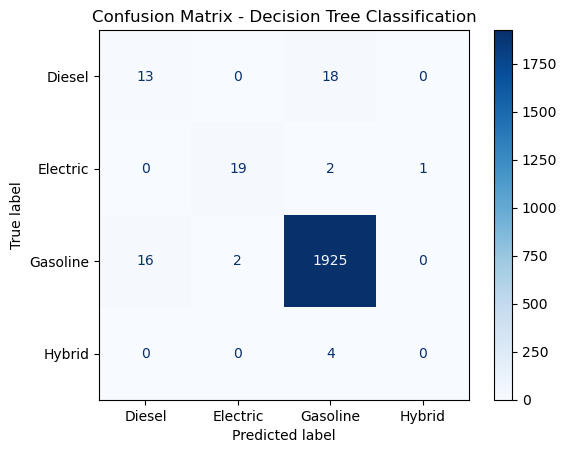

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix visually with real labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.named_steps['model'].classes_)
disp.plot(cmap='Blues')

# Add a clean title
plt.title("Confusion Matrix - Decision Tree Classification")
plt.show()


In [75]:
# ======================================
# 13. Predict Dependent Variable using BEST-FIT CLASSIFIER (Decision Tree)
# ======================================

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare features and target
feature_cols = [c for c in dataset.columns if c != "Fuel Type"]
X = dataset[feature_cols]
y = dataset["Fuel Type"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Preprocessing for numeric & categorical
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Best-fit classifier: Decision Tree
best_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(max_depth=6, random_state=42))
])

# Train the model
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_model.predict(X_test)

print("Predictions using BEST-FIT CLASSIFIER (Decision Tree):")
print(y_pred_best[:20])   # show first 20 predictions


Predictions using BEST-FIT CLASSIFIER (Decision Tree):
['Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline'
 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline'
 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline'
 'Gasoline' 'Gasoline']


In [16]:
import pandas as pd

# Create one sample car input matching your dataset columns
sample = pd.DataFrame([{
    'Make': 'chevrolet',
    'Model': 'Captiva',
    'Year': 2020,
    'Mileage': 55000,
    'Body Type': 'SUV',
    'Cylinders': 4,
    'Transmission': 'Automatic',
    'Color': 'White',
    'Location': 'Dubai',
    'Price': 75000   # include Price if your model used it
}])

# Predict using the trained pipeline
prediction = clf.predict(sample)
print("Predicted Fuel Type:", prediction[0])


Predicted Fuel Type: Gasoline


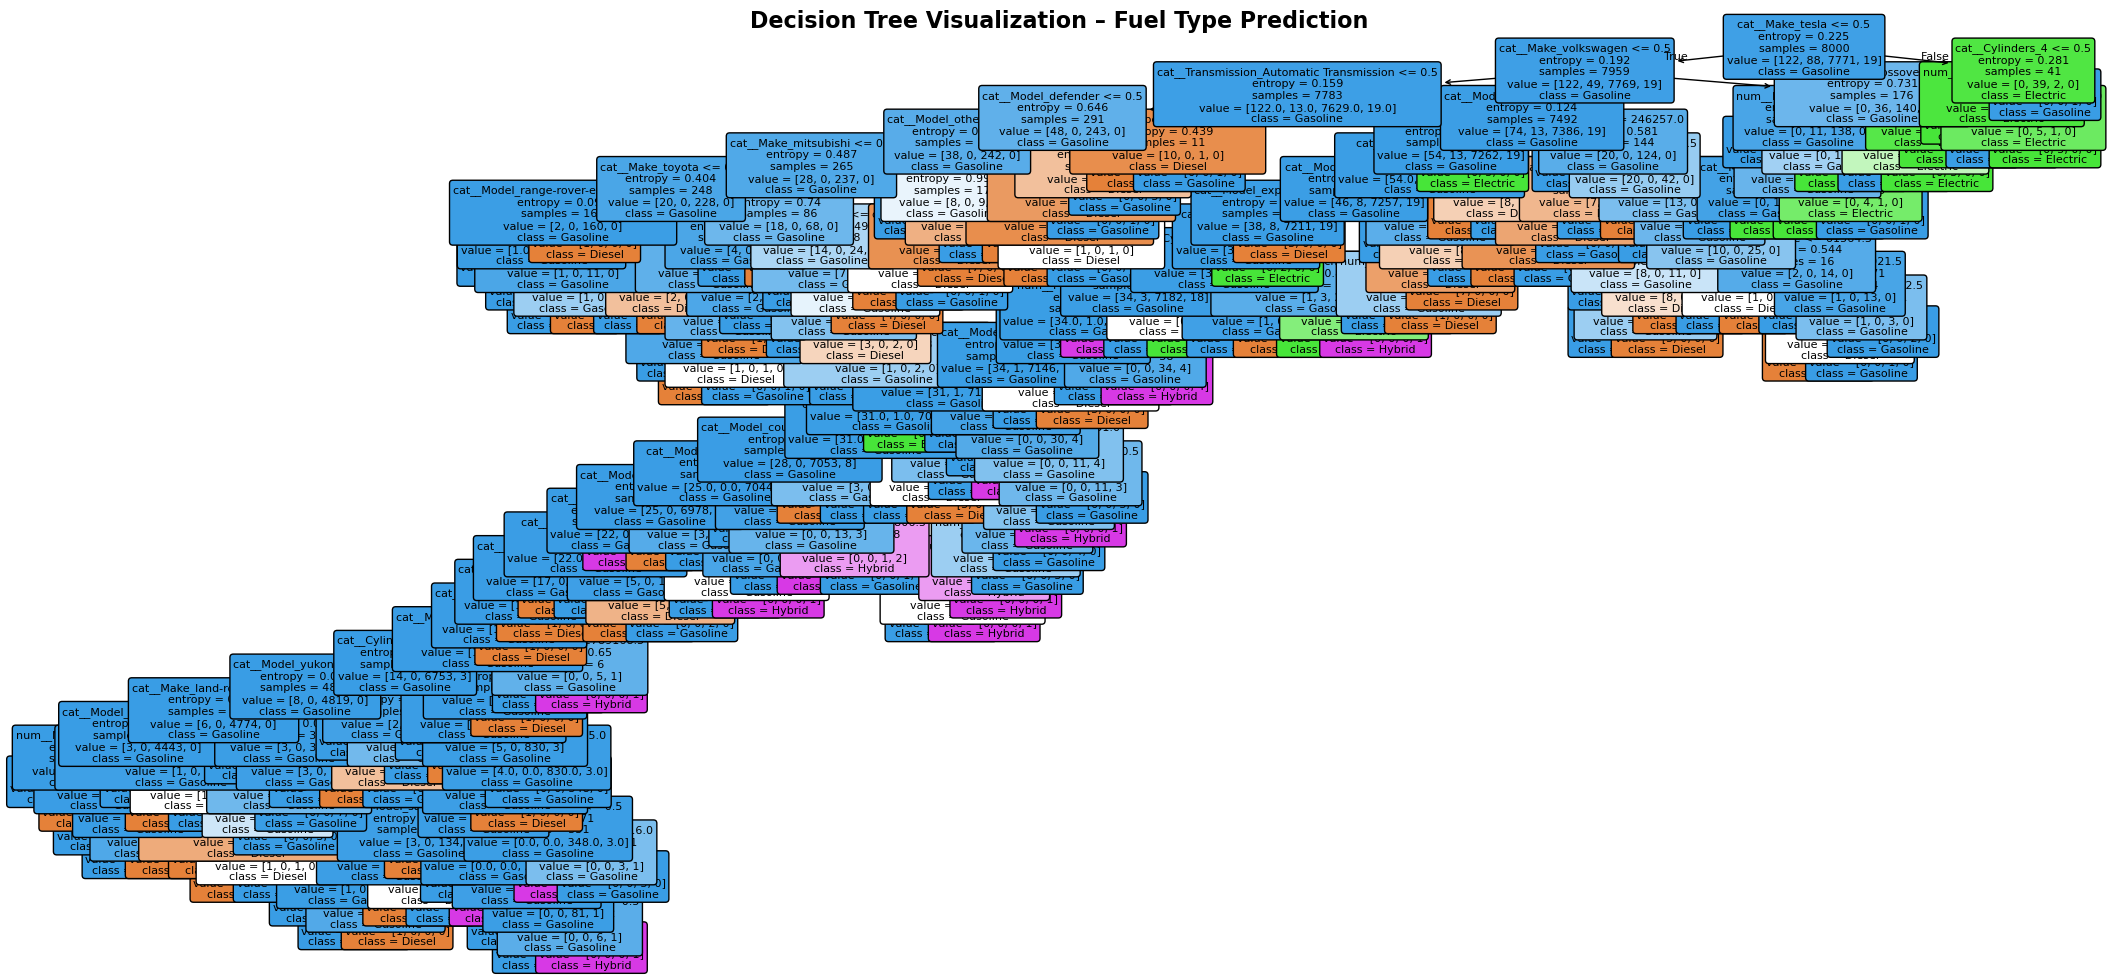

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

# Extract the trained DecisionTreeClassifier from your pipeline
dt_model = clf.named_steps['model']

# Extract the expanded (encoded) feature names after preprocessing
feature_names = clf.named_steps['preprocess'].get_feature_names_out()

# Extract class names (your target variable categories)
class_names = dt_model.classes_

# Create a larger, clear visualization
plt.figure(figsize=(26, 12))
tree.plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8
)

plt.title("Decision Tree Visualization – Fuel Type Prediction", fontsize=16, weight='bold')
plt.show()



In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# 1) Load + split
dataset = pd.read_csv("Data/uae_used_cars.csv")
y = dataset["Fuel Type"]
X = dataset.drop(columns=["Fuel Type", "Description"], errors="ignore")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Preprocess (encode categoricals)
num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns

preprocess = ColumnTransformer([
    ("num", SimpleImputer(strategy="mean"), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("oh", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# 3) Pipeline with Decision Tree (max_depth=3)
clf = Pipeline([
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0))
])

# 4) Fit
clf.fit(X_train, y_train)

# 5) Show the estimator like your screenshot (last line = object)
clf.named_steps["model"]


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

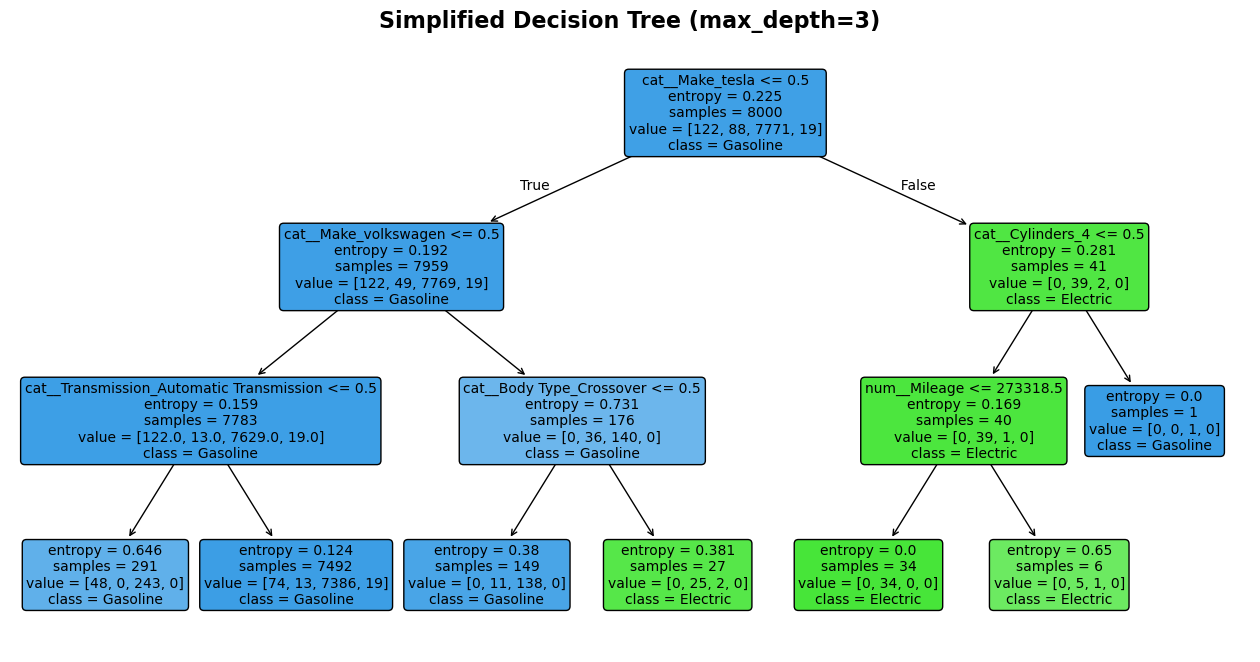

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

# Extract the trained DecisionTreeClassifier from your pipeline
dt_model = clf.named_steps['model']

# Extract the expanded feature names after preprocessing
feature_names = clf.named_steps['preprocess'].get_feature_names_out()

# Extract the actual class names (e.g., Petrol, Diesel, Electric)
class_names = dt_model.classes_

plt.figure(figsize=(16,8))
tree.plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Simplified Decision Tree (max_depth=3)", fontsize=16, fontweight='bold')
plt.show()


Target column: Fuel Type
Numeric features: ['Year', 'Price', 'Mileage']
Categorical features: ['Make', 'Model', 'Body Type', 'Cylinders', 'Transmission', 'Color', 'Location', 'Description']
Decision Tree Accuracy on test set: 0.981


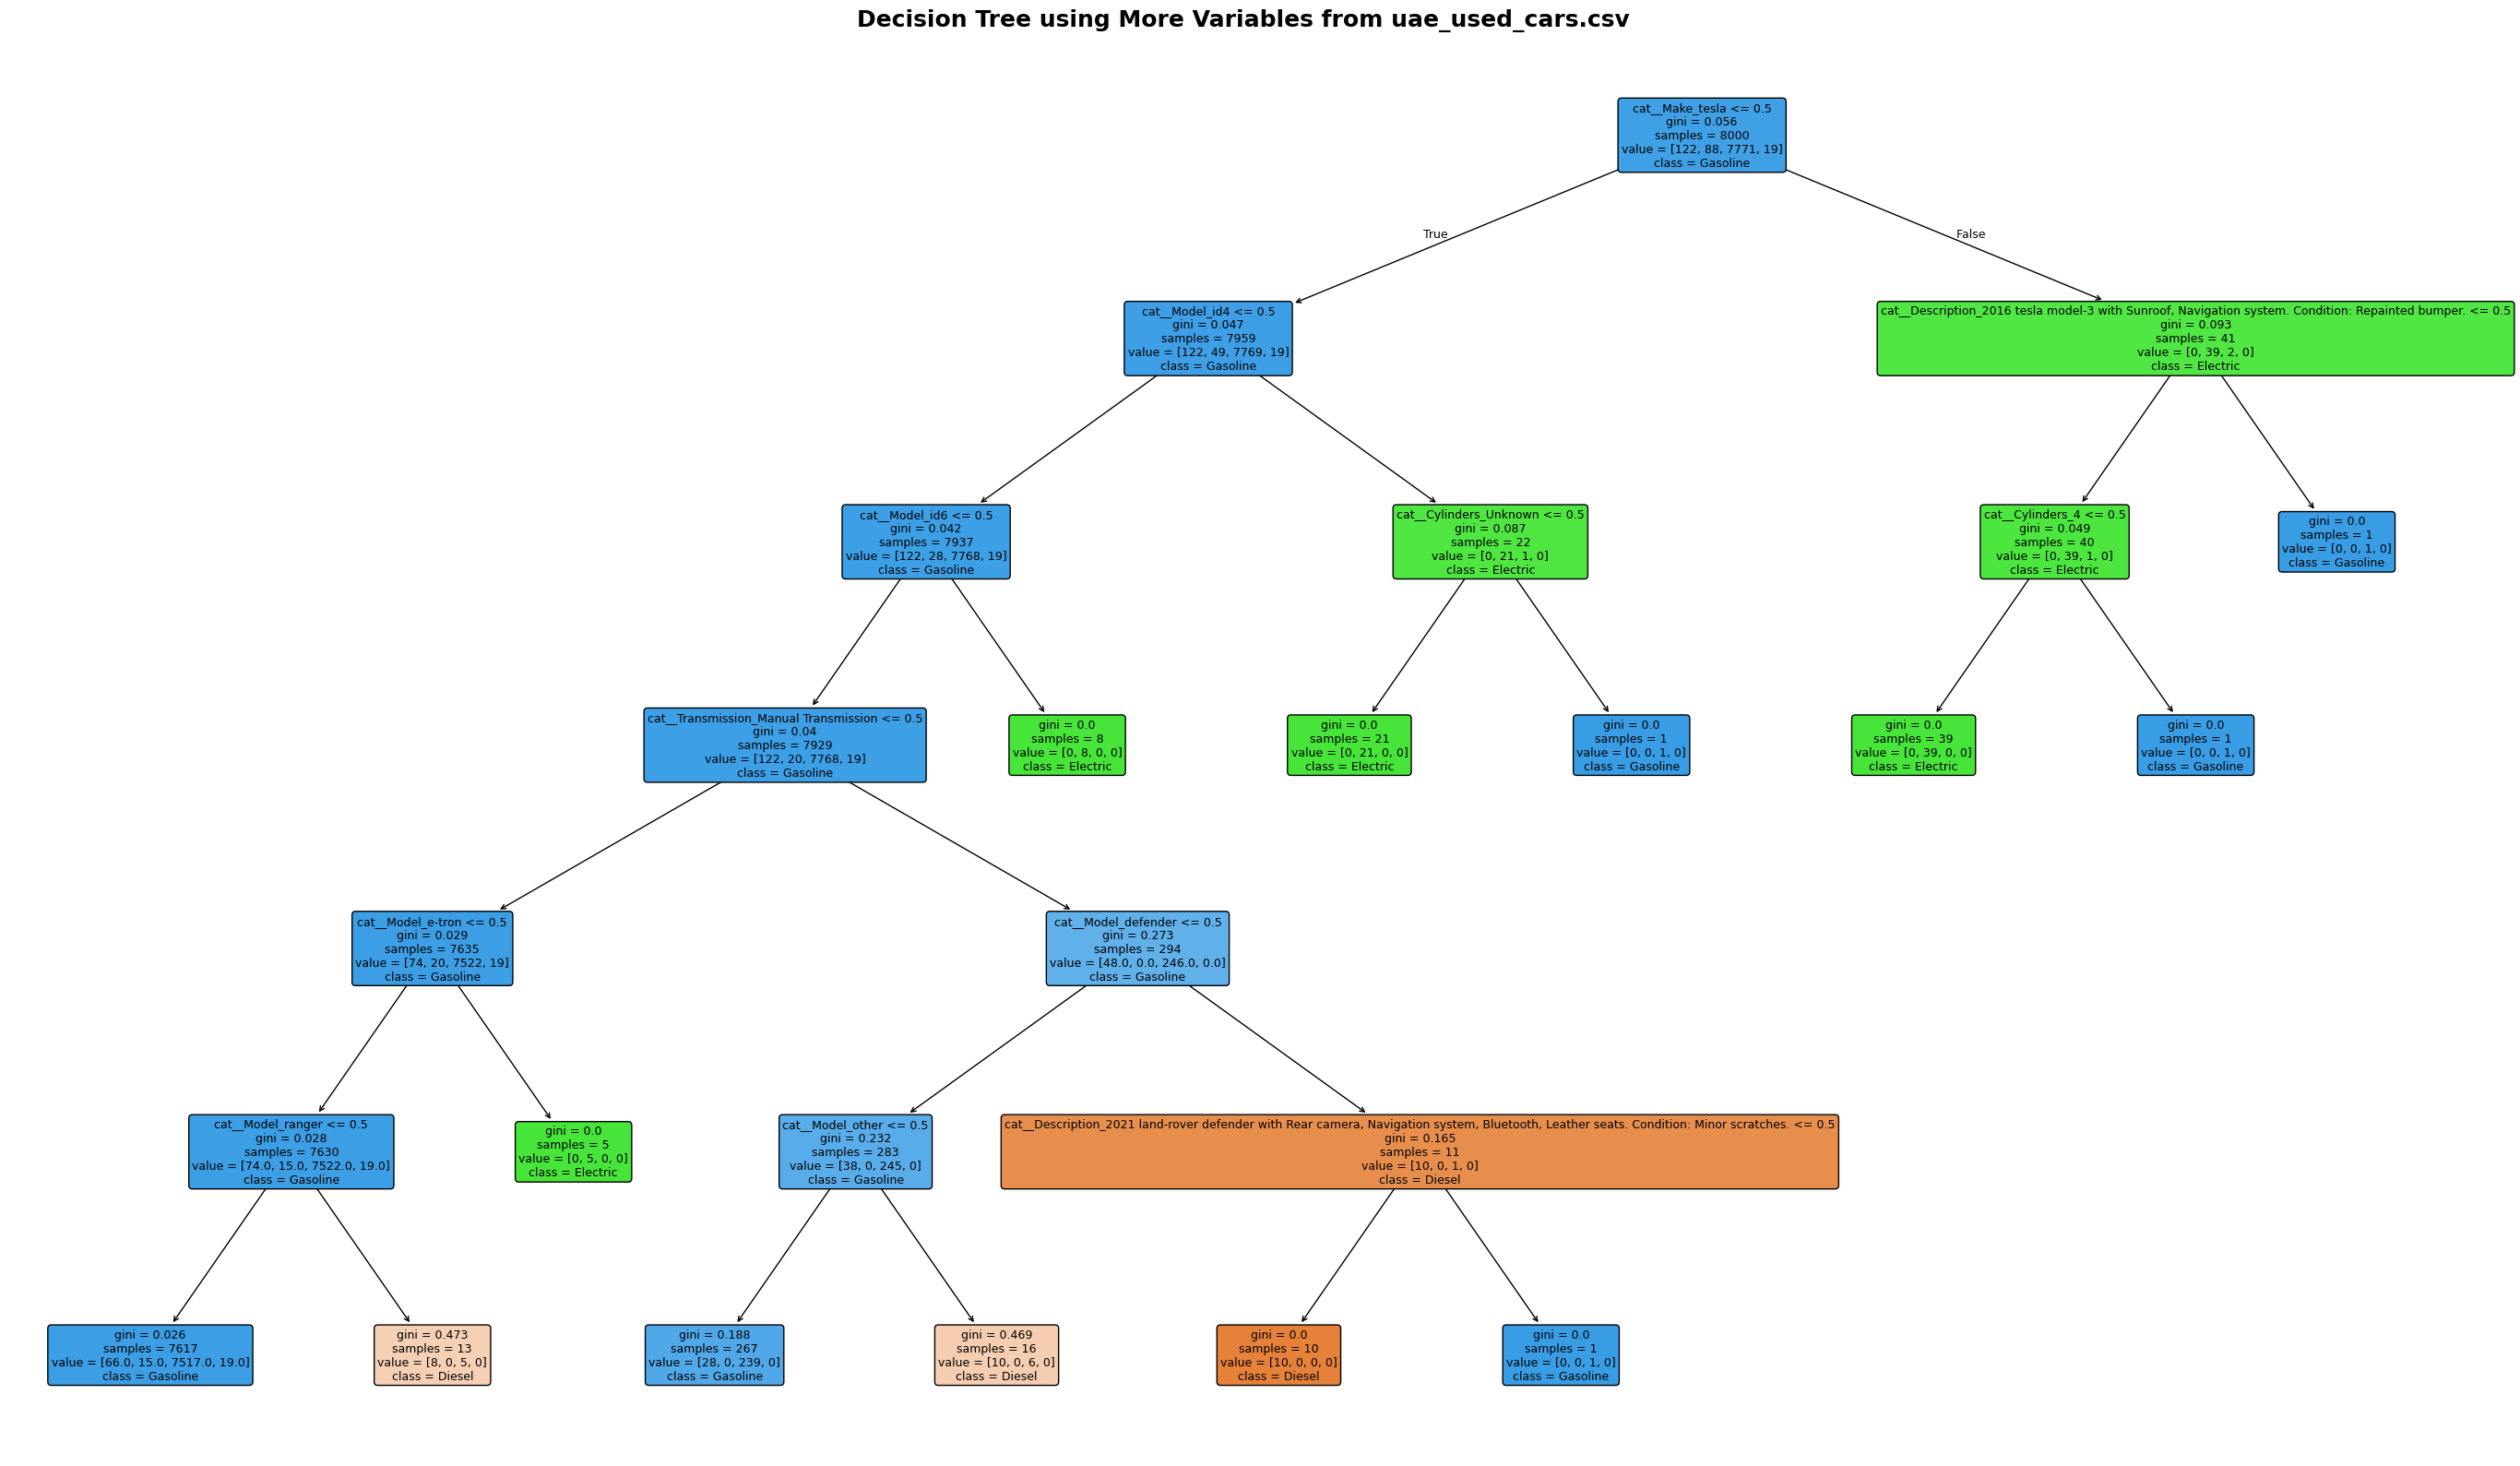

/var/folders/kq/1cpkxsyx75j60jfhm6shgn180000gn/T/ipykernel_47332/3811346225.py:137: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


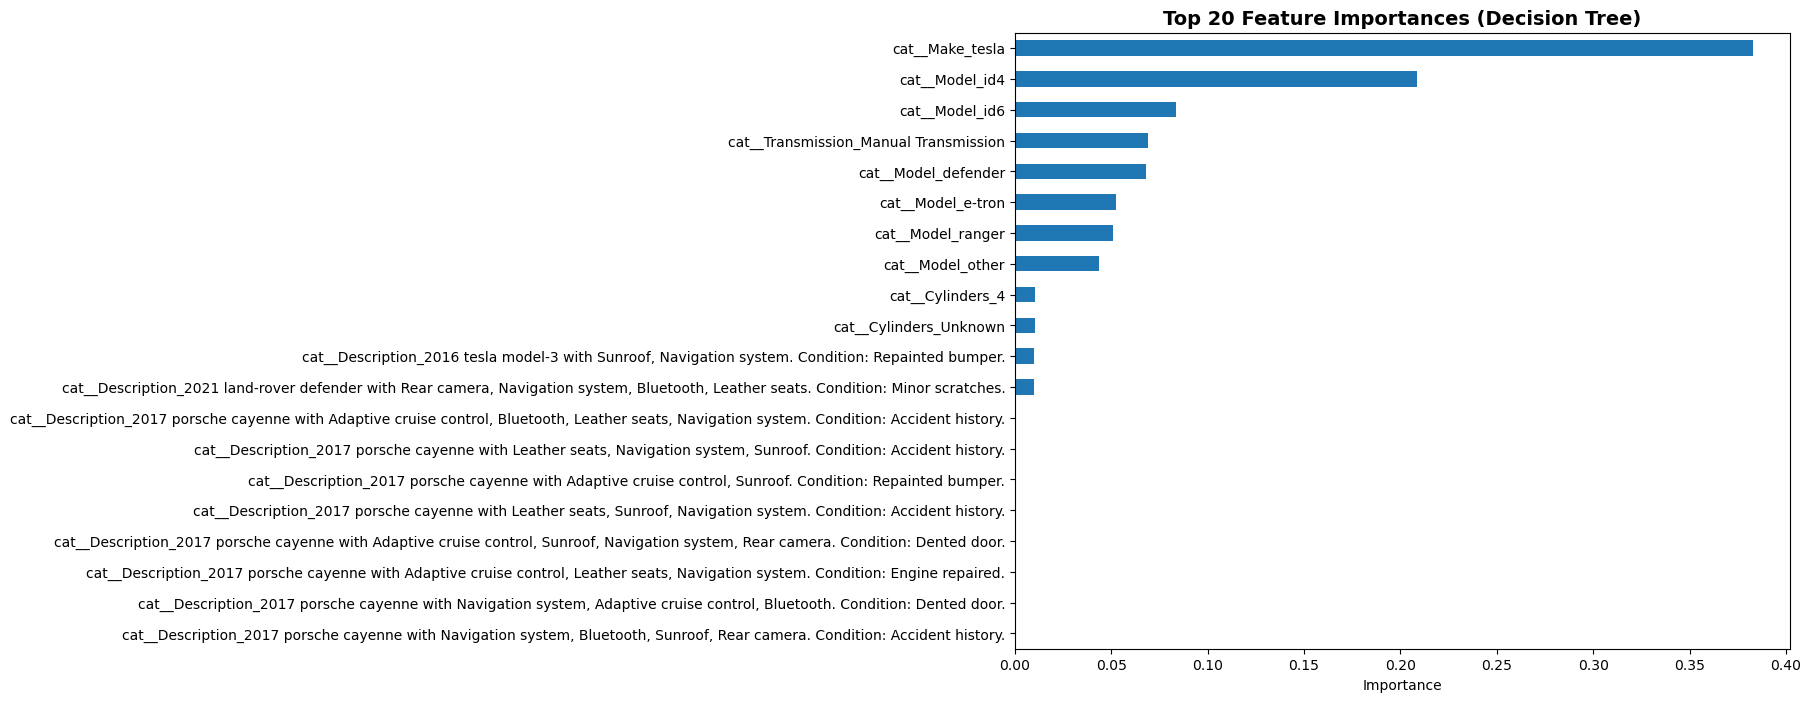

In [37]:
# ==========================================
# Decision Tree on uae_used_cars.csv
# with MORE VARIABLES (auto-detected)
# ==========================================
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ---------- 1) Load your dataset ----------
path_csv = "Data/uae_used_cars.csv"
if os.path.exists(path_csv):
    df = pd.read_csv(path_csv)
else:
    # fallback if your file happens to be xlsx with same name
    xlsx_try = "Data/uae_used_cars.xlsx"
    if os.path.exists(xlsx_try):
        df = pd.read_excel(xlsx_try)
    else:
        raise FileNotFoundError(
            "Could not find Data/uae_used_cars.csv or Data/uae_used_cars.xlsx"
        )

# Clean column names a bit (optional)
df.columns = [c.strip() for c in df.columns]

# ---------- 2) Find the Fuel Type column (case-insensitive) ----------
fuel_candidates = [c for c in df.columns
                   if re.sub(r"\s+", "", c).lower() in {"fueltype", "fuel", "fuels"}]
if not fuel_candidates:
    # broader guess: any column containing 'fuel'
    fuel_candidates = [c for c in df.columns if "fuel" in c.lower()]

if not fuel_candidates:
    raise ValueError("Could not find a 'Fuel Type' column. Rename your target to 'Fuel Type' (or similar).")

TARGET = fuel_candidates[0]   # pick the first match
print("Target column:", TARGET)

# ---------- 3) Choose features = ALL columns except target and obvious IDs ----------
drop_like = {"id", "index", "unnamed: 0"}
feature_cols = [c for c in df.columns
                if c != TARGET and c.strip().lower() not in drop_like]

# Split into numeric & categorical automatically
numeric_features = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df[c])]
categorical_features = [c for c in feature_cols if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

if len(numeric_features) == 0 and len(categorical_features) == 0:
    raise ValueError("No usable features found besides the target. Please check your file.")

# ---------- 4) Build preprocessing ----------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

# ---------- 5) Train/test split ----------
X = df[feature_cols].copy()
y = df[TARGET].astype("category")

# drop rows where y is missing
mask = y.notna()
X, y = X.loc[mask], y.loc[mask]

stratify_val = y if y.nunique() > 1 else None

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_val
)

# ---------- 6) Build & train the Decision Tree ----------
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(random_state=42, max_depth=6))  # change depth if needed
])

clf.fit(X_train, y_train)

# ---------- 7) Quick accuracy ----------
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy on test set: {acc:.3f}")

# ---------- 8) Visualize the tree ----------
dt = clf.named_steps["model"]
feature_names = clf.named_steps["preprocess"].get_feature_names_out()
class_names = dt.classes_

plt.figure(figsize=(28, 16))
plot_tree(
    dt,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree using More Variables from uae_used_cars.csv",
          fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# ---------- 9) Feature importance (top 20) ----------
importances = pd.Series(dt.feature_importances_, index=feature_names)
imp_top = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
imp_top[::-1].plot(kind="barh")
plt.title("Top 20 Feature Importances (Decision Tree)", fontsize=14, fontweight="bold")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


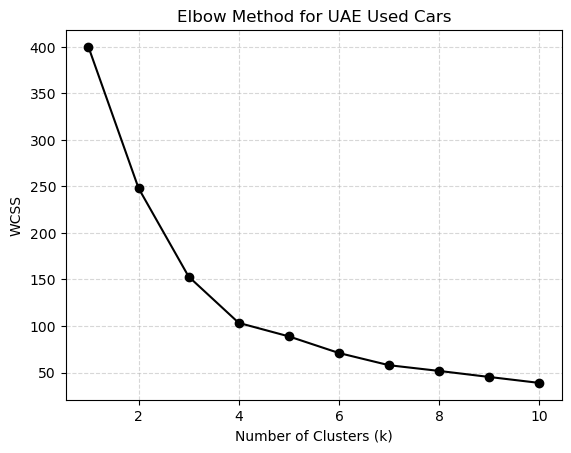

In [38]:
# --- Elbow Method (WCSS) ---
from sklearn.cluster import KMeans 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o', color='black')
plt.title('Elbow Method for UAE Used Cars')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# assumes X_scaled already exists (numeric, scaled features)

# --- Silhouette Scores (for k ≥ 2) with np.float64 wrapper ---
sil_scores = {}
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores[k] = np.float64(silhouette_score(X_scaled, labels))  # wrap for np.float64(...) display

print("Silhouette scores:", sil_scores)

# --- Fit final KMeans (choose k = 5 or based on Elbow/Silhouette) ---
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, init='k-means++', n_init='auto', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


Silhouette scores: {2: np.float64(0.3555619788262874), 3: np.float64(0.3951956568988777), 4: np.float64(0.39198411956061235), 5: np.float64(0.35541807786553137), 6: np.float64(0.37052465387037004), 7: np.float64(0.3729634217122028), 8: np.float64(0.36532041387969644), 9: np.float64(0.3754636692906575), 10: np.float64(0.37530265063155127)}


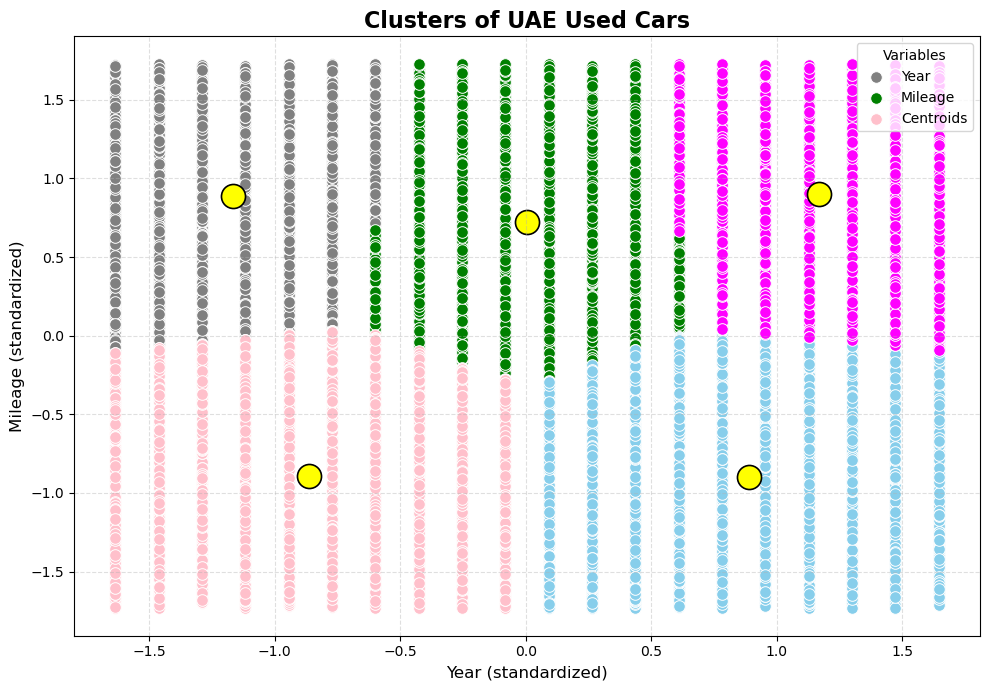

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
dataset = pd.read_csv("Data/uae_used_cars.csv")

# Select variables
cols = ['Year', 'Mileage']
df2 = dataset[cols].dropna().astype(float)

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(df2)

# KMeans clustering
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(X_std)
centroids = kmeans.cluster_centers_

# Plot
plt.figure(figsize=(10, 7))
colors = ['gray', 'green', 'pink', 'skyblue', 'magenta']

for cid in range(k):
    mask = labels == cid
    plt.scatter(X_std[mask, 0], X_std[mask, 1],
                s=70, c=colors[cid], edgecolor='white', linewidth=0.7)

# Centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            s=300, c='yellow', edgecolor='black', linewidth=1.2, label='Centroids')

# Labels and title
plt.title("Clusters of UAE Used Cars", fontsize=16, fontweight='bold')
plt.xlabel("Year (standardized)", fontsize=12)
plt.ylabel("Mileage (standardized)", fontsize=12)

# Legend with variable names
plt.legend(labels=[cols[0], cols[1], 'Centroids'], title="Variables", frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

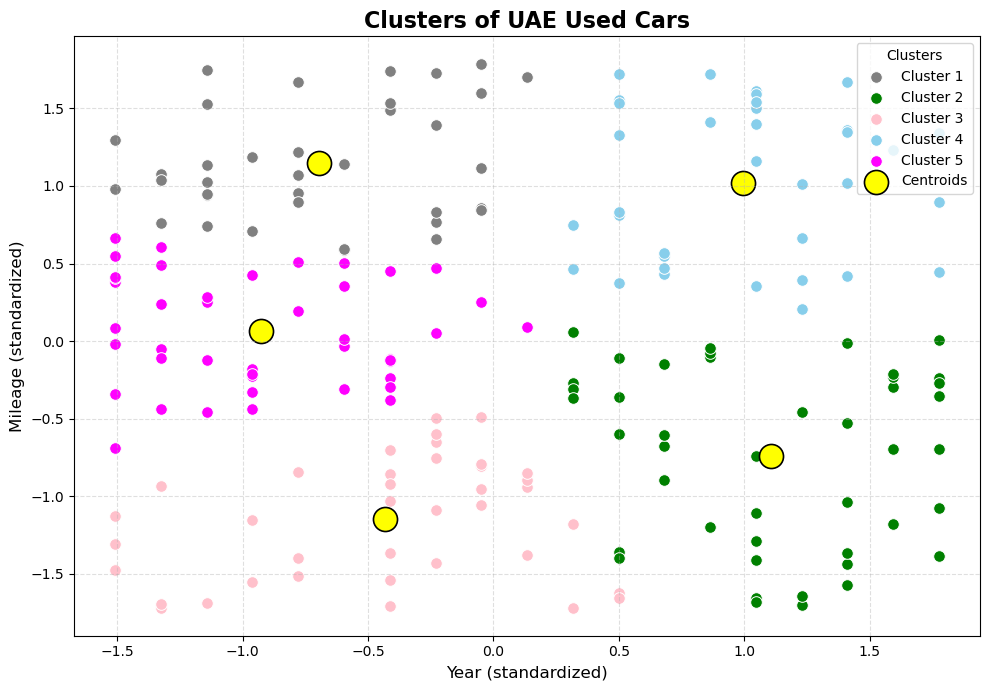

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Load dataset (Excel file, not CSV) ---
dataset = pd.read_excel("Data/uae_used_cars_v2.xlsx")

# --- Select numeric columns for clustering ---
cols = ['Year', 'Mileage']  # you can change or add 'Price' if you want 3D clustering
df2 = dataset[cols].dropna().astype(float)

# --- Standardize the data ---
scaler = StandardScaler()
X_std = scaler.fit_transform(df2)

# --- Apply KMeans clustering ---
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(X_std)
centroids = kmeans.cluster_centers_

# --- Plot clusters ---
plt.figure(figsize=(10, 7))
colors = ['gray', 'green', 'pink', 'skyblue', 'magenta']

for cid in range(k):
    mask = labels == cid
    plt.scatter(
        X_std[mask, 0], X_std[mask, 1],
        s=70,
        c=colors[cid],
        edgecolor='white',
        linewidth=0.7,
        label=f'Cluster {cid + 1}'
    )

# --- Plot centroids ---
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, c='yellow',
    edgecolor='black',
    linewidth=1.2,
    label='Centroids'
)

# --- Labels and title ---
plt.title("Clusters of UAE Used Cars", fontsize=16, fontweight='bold')
plt.xlabel(f"{cols[0]} (standardized)", fontsize=12)
plt.ylabel(f"{cols[1]} (standardized)", fontsize=12)

plt.legend(title="Clusters", frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# Load dataset
dataset = pd.read_excel('Data/uae_used_cars_v2.xlsx')

# Identify old cars (adjust thresholds as needed)
old_cars = dataset[(dataset['Year'] < 2016) & (dataset['Mileage'] > 150000)]

# Display results
print("Cars that may need maintenance:\n")

# Choose existing columns (Brand instead of Make)
columns_to_show = [col for col in ['Brand', 'Model', 'Year', 'Mileage', 'Price'] if col in dataset.columns]
print(old_cars[columns_to_show])

# Show how many found
print(f"\nTotal cars needing maintenance: {len(old_cars)}")


Cars that may need maintenance:

        Brand  Year  Mileage   Price
3         Kia  2012   294062  216232
6      Toyota  2015   157718   41364
9    Mercedes  2012   157443   76991
11   Mercedes  2006   172688  129182
14   Mercedes  2006   202506   74115
..        ...   ...      ...     ...
188       BMW  2008   249833  143874
190     Tesla  2007   176319  211201
193    Nissan  2013   298790   69482
195  Mercedes  2012   220677   29748
198       BMW  2012   206489   28709

[64 rows x 4 columns]

Total cars needing maintenance: 64


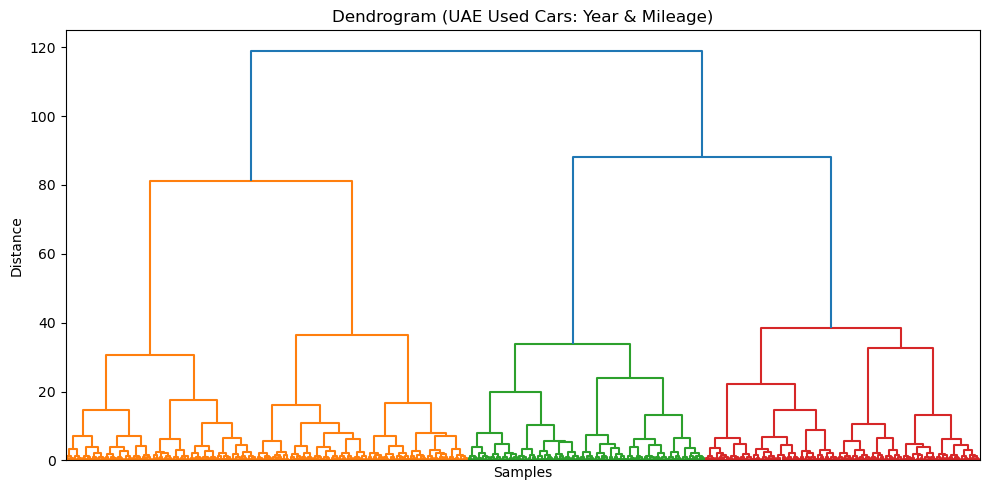

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# --- Load data ---
# Change file name if you want the other upload: 'uae_used_cars (1).csv'
df = pd.read_csv('Data/uae_used_cars.csv')

# --- Select features: Year & Mileage ---
X = df[['Year', 'Mileage']].dropna().to_numpy()

# --- Scale (important when mixing Year and Mileage) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Dendrogram (Ward linkage on scaled data) ---
plt.figure(figsize=(10, 5))
Z = sch.linkage(X_scaled, method='ward')  # ward requires Euclidean distances
sch.dendrogram(Z, no_labels=True)         # hide labels if many points
plt.title('Dendrogram (UAE Used Cars: Year & Mileage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


Cluster labels: [1 1 3 ... 2 3 4]


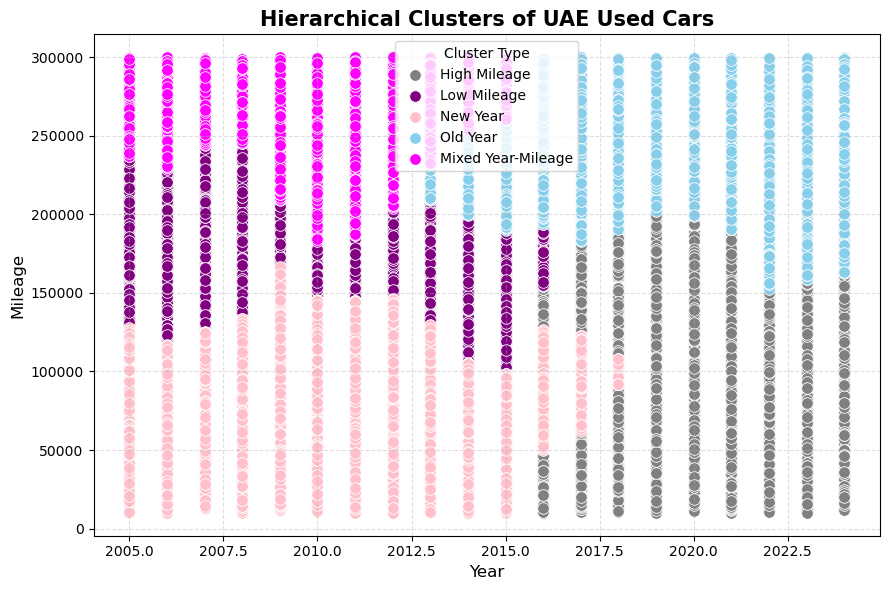

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(X_scaled)
print("Cluster labels:", y_hc)

# Define your feature names (update if you used other columns)
feature_x = 'Year'
feature_y = 'Mileage'

# Custom names for each cluster (you can rename based on your data meaning)
cluster_labels = [
    f'High {feature_y}', 
    f'Low {feature_y}', 
    f'New {feature_x}', 
    f'Old {feature_x}', 
    f'Mixed {feature_x}-{feature_y}'
]

# Plot
plt.figure(figsize=(9, 6))
colors = ['gray', 'purple', 'pink', 'skyblue', 'magenta']

for i, color in enumerate(colors):
    mask = (y_hc == i)
    plt.scatter(
        X[mask, 0], X[mask, 1],
        s=70, c=color, label=cluster_labels[i],
        edgecolors='white', linewidths=0.6
    )

# Labels, title, and legend
plt.title('Hierarchical Clusters of UAE Used Cars', fontsize=15, fontweight='bold')
plt.xlabel(f'{feature_x}', fontsize=12)
plt.ylabel(f'{feature_y}', fontsize=12)
plt.legend(title="Cluster Type", frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



Cluster labels: [1 3 0 4 0 3 1 0 1 1 1 1 2 1 1 1 2 2 3 0 3 3 2 3 0 4 1 2 1 1 1 2 1 2 3 0 0
 2 1 0 0 3 4 0 3 1 3 4 1 1 1 4 1 3 0 4 1 0 0 2 2 1 3 0 3 2 3 3 2 1 2 0 1 1
 0 1 2 1 0 2 2 0 1 1 0 4 0 0 4 0 0 0 0 4 1 2 1 1 2 0 0 1 4 0 2 0 4 4 4 2 4
 0 2 2 0 0 3 0 3 1 4 1 0 3 2 1 2 4 3 4 0 0 1 0 2 0 1 1 1 2 1 4 0 4 0 1 4 4
 3 0 2 3 0 3 3 0 4 1 4 3 0 2 2 2 1 0 0 1 1 3 1 0 1 0 0 2 1 4 1 1 2 3 2 0 0
 1 2 4 4 2 1 3 0 4 0 1 0 3 1 0]


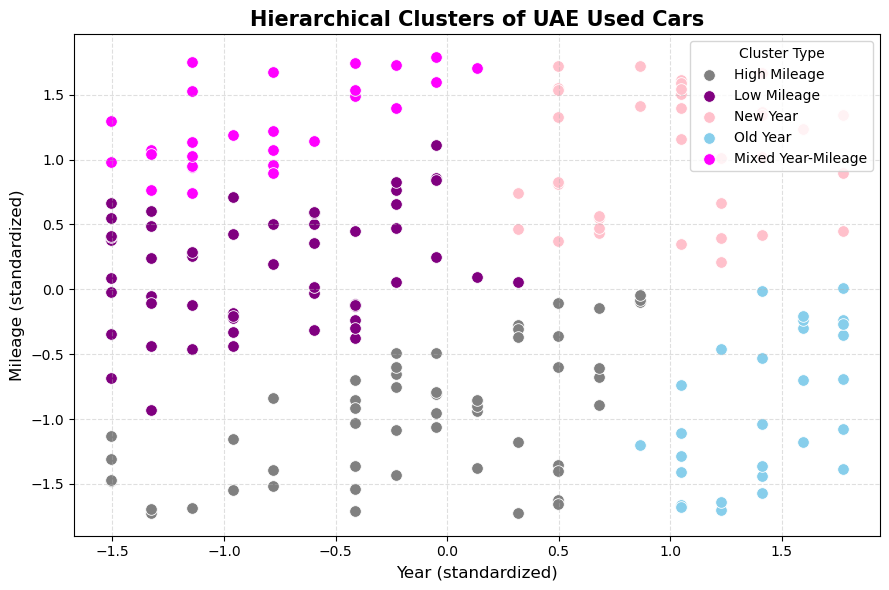

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# --- Load your dataset ---
dataset = pd.read_excel('Data/uae_used_cars_v2.xlsx')

# --- Select two features for clustering ---
X = dataset[['Year', 'Mileage']].dropna().astype(float)

# --- Standardize data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Perform Agglomerative Clustering ---
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(X_scaled)
print("Cluster labels:", y_hc)

# --- Define feature names for axes ---
feature_x = 'Year'
feature_y = 'Mileage'

# --- Custom names for clusters (optional) ---
cluster_labels = [
    f'High {feature_y}', 
    f'Low {feature_y}', 
    f'New {feature_x}', 
    f'Old {feature_x}', 
    f'Mixed {feature_x}-{feature_y}'
]

# --- Plot clusters ---
plt.figure(figsize=(9, 6))
colors = ['gray', 'purple', 'pink', 'skyblue', 'magenta']

# Convert to NumPy for easy slicing
X_np = X_scaled

for i, color in enumerate(colors):
    mask = (y_hc == i)
    plt.scatter(
        X_np[mask, 0], X_np[mask, 1],
        s=70, c=color, label=cluster_labels[i],
        edgecolors='white', linewidths=0.6
    )

# --- Labels, title, and legend ---
plt.title('Hierarchical Clusters of UAE Used Cars', fontsize=15, fontweight='bold')
plt.xlabel(f'{feature_x} (standardized)', fontsize=12)
plt.ylabel(f'{feature_y} (standardized)', fontsize=12)
plt.legend(title="Cluster Type", frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [63]:
# ======================================
# Hypothesis Testing: Correlation
# Pearson & Spearman between Year and Mileage
# ======================================

import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Load dataset
dataset = pd.read_excel("Data/uae_used_cars_v2.xlsx")

# Numeric variables
x = dataset["Year"]
y = dataset["Mileage"]

# Drop missing values
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Pearson Test (linear correlation)
pearson_corr, pearson_p = pearsonr(x, y)

# Spearman Test (rank correlation)
spearman_corr, spearman_p = spearmanr(x, y)

print("📊 Pearson Correlation Test:")
print(f"Correlation Coefficient = {pearson_corr:.3f}, p-value = {pearson_p:.5f}")

print("\n📊 Spearman Correlation Test:")
print(f"Correlation Coefficient = {spearman_corr:.3f}, p-value = {spearman_p:.5f}")


📊 Pearson Correlation Test:
Correlation Coefficient = -0.048, p-value = 0.50395

📊 Spearman Correlation Test:
Correlation Coefficient = -0.053, p-value = 0.45904


In [66]:
# ==========================================
# One-Sample T-Test on Mileage
# ==========================================

import pandas as pd
from scipy.stats import ttest_1samp

# Load dataset
dataset = pd.read_csv("Data/uae_used_cars.csv")

# Select dependent variable
mileage = dataset["Mileage"].dropna()

# Hypothesized population mean (example: 150,000 km)
population_mean = 150000

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(mileage, population_mean)

print("📌 One-Sample T-Test on Mileage")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value = {p_value:.5f}")
print(f"Sample Mean = {mileage.mean():.2f} km")


📌 One-Sample T-Test on Mileage
T-statistic = 6.168
P-value = 0.00000
Sample Mean = 155161.87 km


In [46]:
# --- Descriptive Statistics Function (Full Dataset) ---

import pandas as pd

# Load the dataset
dataset = pd.read_csv('Data/uae_used_cars.csv')

# Define the descriptive analysis function
def descriptive_analysis(dataset, column):
    """
    This function calculates descriptive statistics such as
    count, mean, standard deviation, minimum, and maximum values
    for the selected column.
    """
    stats = dataset[column].describe()
    print(f"Descriptive Statistics for '{column}' (Full Dataset):\n")
    print(stats)
  

# Apply the function to the 'Mileage' column
descriptive_analysis(dataset, 'Mileage')


Descriptive Statistics for 'Mileage' (Full Dataset):

count     10000.000000
mean     155161.871700
std       83681.858983
min       10006.000000
25%       82904.000000
50%      154370.500000
75%      227551.250000
max      299996.000000
Name: Mileage, dtype: float64


In [47]:
# --- Detailed Descriptive Statistics for Dependent Variable (Mileage) ---

import pandas as pd

# Load dataset
dataset = pd.read_csv('Data/uae_used_cars.csv')

# Display detailed descriptive statistics for 'Mileage'
desc_stats = dataset['Mileage'].describe()
print("Detailed Descriptive Statistics for 'Mileage':\n")
print(desc_stats)

# Optional: additional insight like variance and range
variance = dataset['Mileage'].var()
data_range = dataset['Mileage'].max() - dataset['Mileage'].min()

print(f"\nVariance: {variance:.2f}")
print(f"Range: {data_range:.2f}")


Detailed Descriptive Statistics for 'Mileage':

count     10000.000000
mean     155161.871700
std       83681.858983
min       10006.000000
25%       82904.000000
50%      154370.500000
75%      227551.250000
max      299996.000000
Name: Mileage, dtype: float64

Variance: 7002653522.88
Range: 289990.00


In [64]:
# ======================================
# Hypothesis Testing: Correlation
# Pearson & Spearman between Year and Mileage
# ======================================

import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Load dataset
dataset = pd.read_excel("Data/uae_used_cars_v2.xlsx")

# Numeric variables
x = dataset["Year"]
y = dataset["Mileage"]

# Drop missing values
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Pearson Test (linear correlation)
pearson_corr, pearson_p = pearsonr(x, y)

# Spearman Test (rank correlation)
spearman_corr, spearman_p = spearmanr(x, y)

print("📊 Pearson Correlation Test:")
print(f"Correlation Coefficient = {pearson_corr:.3f}, p-value = {pearson_p:.5f}")

print("\n📊 Spearman Correlation Test:")
print(f"Correlation Coefficient = {spearman_corr:.3f}, p-value = {spearman_p:.5f}")


📊 Pearson Correlation Test:
Correlation Coefficient = -0.048, p-value = 0.50395

📊 Spearman Correlation Test:
Correlation Coefficient = -0.053, p-value = 0.45904


In [65]:
# ==========================================
# One-Sample T-Test on Mileage
# ==========================================

import pandas as pd
from scipy.stats import ttest_1samp

# Load dataset
dataset = pd.read_csv("Data/uae_used_cars.csv")

# Select dependent variable
mileage = dataset["Mileage"].dropna()

# Hypothesized population mean (example: 150,000 km)
population_mean = 150000

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(mileage, population_mean)

print("📌 One-Sample T-Test on Mileage")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value = {p_value:.5f}")
print(f"Sample Mean = {mileage.mean():.2f} km")


📌 One-Sample T-Test on Mileage
T-statistic = 6.168
P-value = 0.00000
Sample Mean = 155161.87 km


In [72]:
# ======================================
# CLASSIFICATION: Logistic Regression & Naïve Bayes
# Target Variable: Fuel Type
# ======================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# ---- Load dataset ----
df = pd.read_csv("Data/uae_used_cars.csv")

# ---- Clean + Identify Target ----
TARGET = "Fuel Type"
df = df.dropna(subset=[TARGET])   # remove missing fuel types

# ---- Select features (all except target + IDs) ----
drop_cols = ["id", "ID", "Index", "Unnamed: 0", TARGET]
feature_cols = [c for c in df.columns if c not in drop_cols]

# Identify numeric / categorical
numeric_features = [c for c in feature_cols if pd.api.types.is_numeric_dtype(df[c])]
categorical_features = [c for c in feature_cols if c not in numeric_features]

# ---- Preprocessing ----
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ---- Train/test split ----
X = df[feature_cols]
y = df[TARGET].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ======================================
# 1️⃣ Logistic Regression
# ======================================
log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=300))
])

log_reg_clf.fit(X_train, y_train)
y_pred_log = log_reg_clf.predict(X_test)

print("\n==============================")
print("📌 LOGISTIC REGRESSION RESULTS")
print("==============================")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


# ======================================
# 2️⃣ Naïve Bayes (GaussianNB)
# ======================================

# GaussianNB needs dense data, so we preprocess first manually:
X_train_nb = preprocess.fit_transform(X_train)
X_test_nb = preprocess.transform(X_test)

nb_clf = GaussianNB()
nb_clf.fit(X_train_nb.toarray() if hasattr(X_train_nb, "toarray") else X_train_nb, y_train)

y_pred_nb = nb_clf.predict(X_test_nb.toarray() if hasattr(X_test_nb, "toarray") else X_test_nb)

print("\n==============================")
print("📌 NAÏVE BAYES RESULTS")
print("==============================")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))



📌 LOGISTIC REGRESSION RESULTS
Accuracy: 0.98
Confusion Matrix:
 [[   8    0   30    0]
 [   0   24    4    0]
 [  10    0 2418    0]
 [   0    0    6    0]]

📌 NAÏVE BAYES RESULTS
Accuracy: 0.8216
Confusion Matrix:
 [[  35    0    3    0]
 [   0   28    0    0]
 [ 374    6 1988   60]
 [   1    0    2    3]]


In [73]:
# =========================================================
# CLASSIFICATION – FOUR MODELS ON Fuel Type
# Logistic Regression, KNN, Naïve Bayes, Decision Tree
# =========================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

# ---------- 1) Load dataset ----------
df = pd.read_csv("Data/uae_used_cars.csv")

TARGET = "Fuel Type"
df = df.dropna(subset=[TARGET])        # remove rows with missing target

# ---------- 2) Features ----------
drop_cols = ["id", "ID", "Index", "Unnamed: 0", TARGET]
feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols]
y = df[TARGET].astype(str)

# numeric / categorical split
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# ---------- 3) Preprocessing ----------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ---------- 4) Train–test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ---------- 5) Define models ----------
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42)
}

# NOTE: Naive Bayes can't be inside the same pipeline (because it wants dense data),
# so we'll treat it slightly differently below.

# ---------- 6) Train & evaluate Logistic, KNN, Decision Tree ----------
for name in ["Logistic Regression", "KNN", "Decision Tree"]:
    clf = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", models[name])
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("\n==============================")
    print(f"📌 {name} RESULTS")
    print("==============================")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
# ---------- 7) Train & evaluate Naive Bayes separately ----------
# Preprocess to numeric matrix first
X_train_nb = preprocess.fit_transform(X_train)
X_test_nb = preprocess.transform(X_test)

nb_clf = models["Naive Bayes"]
X_train_nb_dense = X_train_nb.toarray() if hasattr(X_train_nb, "toarray") else X_train_nb
X_test_nb_dense = X_test_nb.toarray() if hasattr(X_test_nb, "toarray") else X_test_nb

nb_clf.fit(X_train_nb_dense, y_train)
y_pred_nb = nb_clf.predict(X_test_nb_dense)

print("\n==============================")
print("📌 Naive Bayes RESULTS")
print("==============================")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Numeric features: ['Year', 'Price', 'Mileage']
Categorical features: ['Make', 'Model', 'Body Type', 'Cylinders', 'Transmission', 'Color', 'Location', 'Description']

📌 Logistic Regression RESULTS
Accuracy: 0.98
Confusion Matrix:
 [[   8    0   30    0]
 [   0   24    4    0]
 [  10    0 2418    0]
 [   0    0    6    0]]

📌 KNN RESULTS
Accuracy: 0.9756
Confusion Matrix:
 [[   2    0   36    0]
 [   0   16   12    0]
 [   6    1 2421    0]
 [   0    0    6    0]]

📌 Decision Tree RESULTS
Accuracy: 0.982
Confusion Matrix:
 [[   5    0   33    0]
 [   0   24    4    0]
 [   2    0 2426    0]
 [   0    0    6    0]]

📌 Naive Bayes RESULTS
Accuracy: 0.8216
Confusion Matrix:
 [[  35    0    3    0]
 [   0   28    0    0]
 [ 374    6 1988   60]
 [   1    0    2    3]]


In [74]:
# ======================================
# 13. Predict Dependent Variable using BEST-FIT CLASSIFIER (Decision Tree)
# ======================================

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare features and target
feature_cols = [c for c in dataset.columns if c != "Fuel Type"]
X = dataset[feature_cols]
y = dataset["Fuel Type"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Preprocessing for numeric & categorical
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Best-fit classifier: Decision Tree
best_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(max_depth=6, random_state=42))
])

# Train the model
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_model.predict(X_test)

print("Predictions using BEST-FIT CLASSIFIER (Decision Tree):")
print(y_pred_best[:20])   # show first 20 predictions


Predictions using BEST-FIT CLASSIFIER (Decision Tree):
['Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline'
 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline'
 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline' 'Gasoline'
 'Gasoline' 'Gasoline']


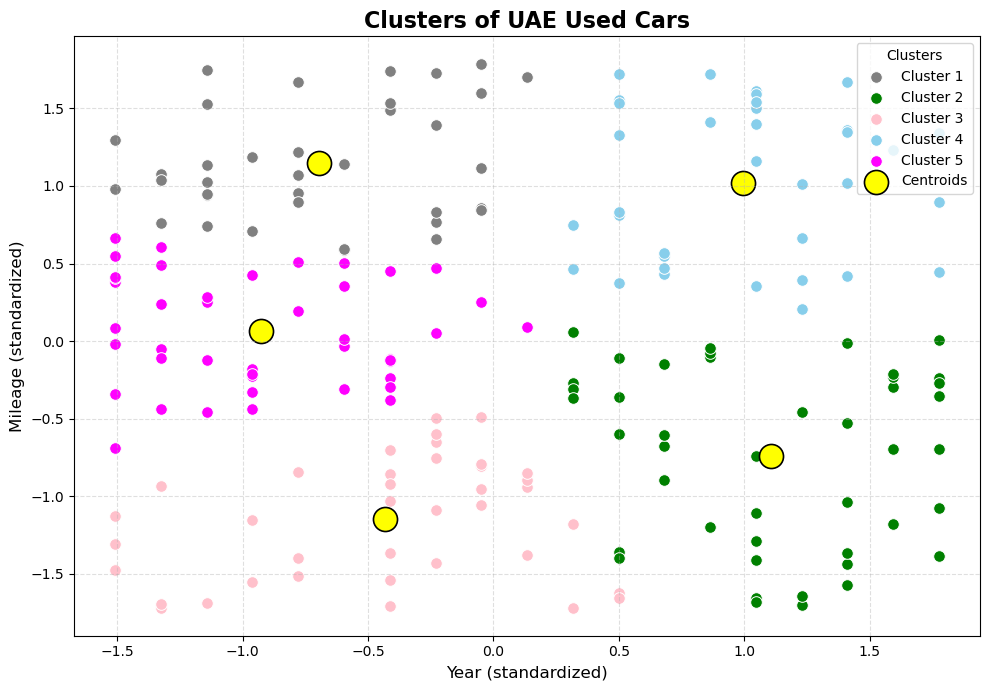

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Load dataset (Excel file, not CSV) ---
dataset = pd.read_excel("Data/uae_used_cars_v2.xlsx")

# --- Select numeric columns for clustering ---
cols = ['Year', 'Mileage']  # you can change or add 'Price' if you want 3D clustering
df2 = dataset[cols].dropna().astype(float)

# --- Standardize the data ---
scaler = StandardScaler()
X_std = scaler.fit_transform(df2)

# --- Apply KMeans clustering ---
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(X_std)
centroids = kmeans.cluster_centers_

# --- Plot clusters ---
plt.figure(figsize=(10, 7))
colors = ['gray', 'green', 'pink', 'skyblue', 'magenta']

for cid in range(k):
    mask = labels == cid
    plt.scatter(
        X_std[mask, 0], X_std[mask, 1],
        s=70,
        c=colors[cid],
        edgecolor='white',
        linewidth=0.7,
        label=f'Cluster {cid + 1}'
    )

# --- Plot centroids ---
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, c='yellow',
    edgecolor='black',
    linewidth=1.2,
    label='Centroids'
)

# --- Labels and title ---
plt.title("Clusters of UAE Used Cars", fontsize=16, fontweight='bold')
plt.xlabel(f"{cols[0]} (standardized)", fontsize=12)
plt.ylabel(f"{cols[1]} (standardized)", fontsize=12)

plt.legend(title="Clusters", frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Cluster labels: [1 3 0 4 0 3 1 0 1 1 1 1 2 1 1 1 2 2 3 0 3 3 2 3 0 4 1 2 1 1 1 2 1 2 3 0 0
 2 1 0 0 3 4 0 3 1 3 4 1 1 1 4 1 3 0 4 1 0 0 2 2 1 3 0 3 2 3 3 2 1 2 0 1 1
 0 1 2 1 0 2 2 0 1 1 0 4 0 0 4 0 0 0 0 4 1 2 1 1 2 0 0 1 4 0 2 0 4 4 4 2 4
 0 2 2 0 0 3 0 3 1 4 1 0 3 2 1 2 4 3 4 0 0 1 0 2 0 1 1 1 2 1 4 0 4 0 1 4 4
 3 0 2 3 0 3 3 0 4 1 4 3 0 2 2 2 1 0 0 1 1 3 1 0 1 0 0 2 1 4 1 1 2 3 2 0 0
 1 2 4 4 2 1 3 0 4 0 1 0 3 1 0]


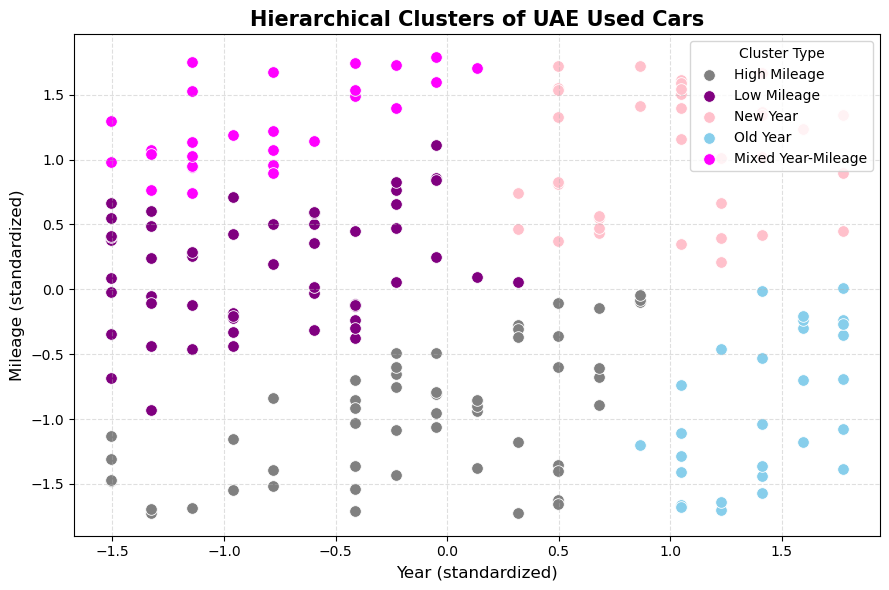

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# --- Load your dataset ---
dataset = pd.read_excel('Data/uae_used_cars_v2.xlsx')

# --- Select two features for clustering ---
X = dataset[['Year', 'Mileage']].dropna().astype(float)

# --- Standardize data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Perform Agglomerative Clustering ---
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(X_scaled)
print("Cluster labels:", y_hc)

# --- Define feature names for axes ---
feature_x = 'Year'
feature_y = 'Mileage'

# --- Custom names for clusters (optional) ---
cluster_labels = [
    f'High {feature_y}', 
    f'Low {feature_y}', 
    f'New {feature_x}', 
    f'Old {feature_x}', 
    f'Mixed {feature_x}-{feature_y}'
]

# --- Plot clusters ---
plt.figure(figsize=(9, 6))
colors = ['gray', 'purple', 'pink', 'skyblue', 'magenta']

# Convert to NumPy for easy slicing
X_np = X_scaled

for i, color in enumerate(colors):
    mask = (y_hc == i)
    plt.scatter(
        X_np[mask, 0], X_np[mask, 1],
        s=70, c=color, label=cluster_labels[i],
        edgecolors='white', linewidths=0.6
    )

# --- Labels, title, and legend ---
plt.title('Hierarchical Clusters of UAE Used Cars', fontsize=15, fontweight='bold')
plt.xlabel(f'{feature_x} (standardized)', fontsize=12)
plt.ylabel(f'{feature_y} (standardized)', fontsize=12)
plt.legend(title="Cluster Type", frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


✅ Saved: Poster_FuelType_Distribution.png


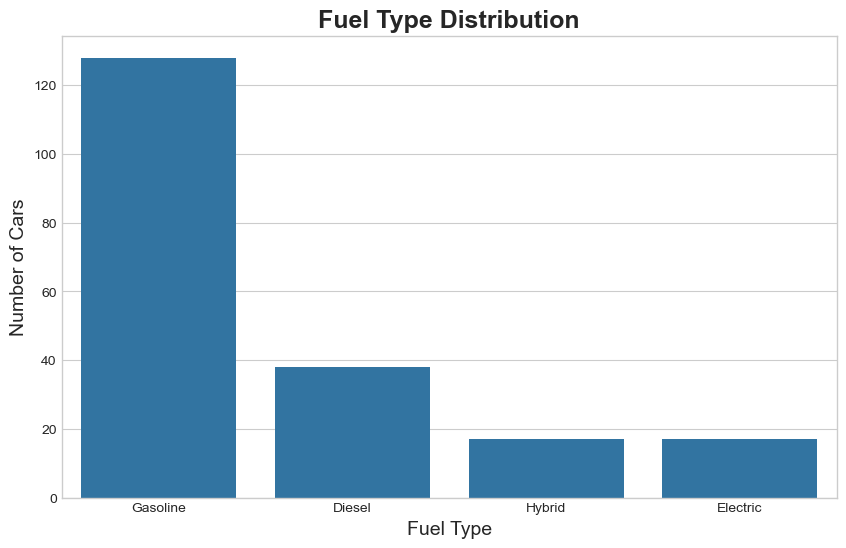

✅ Saved: Poster_Scatter_Mileage_Year_FuelType.png


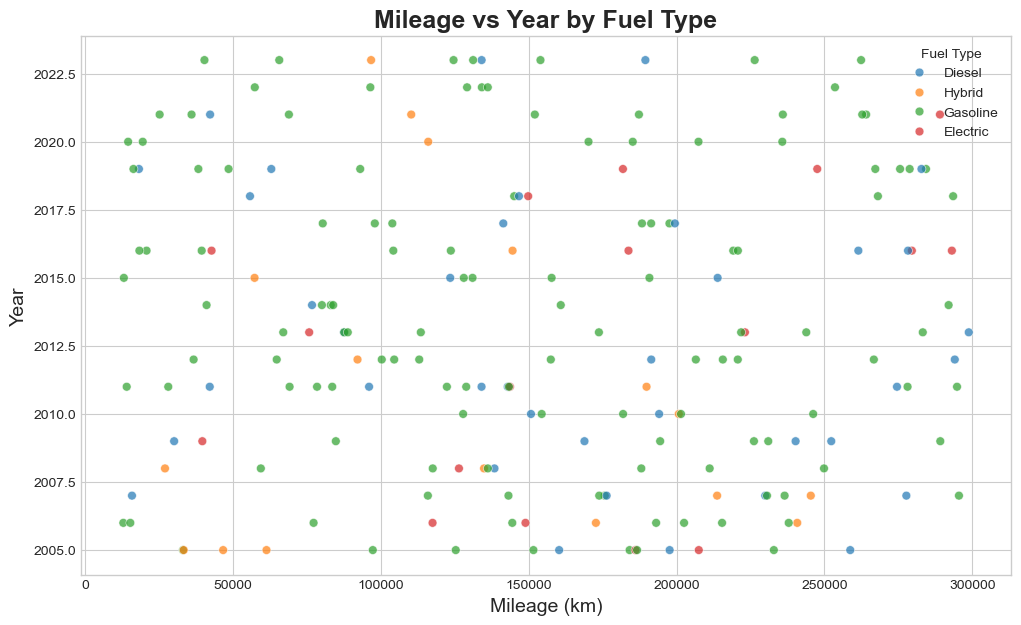

✅ Saved: Poster_Histogram_Mileage.png


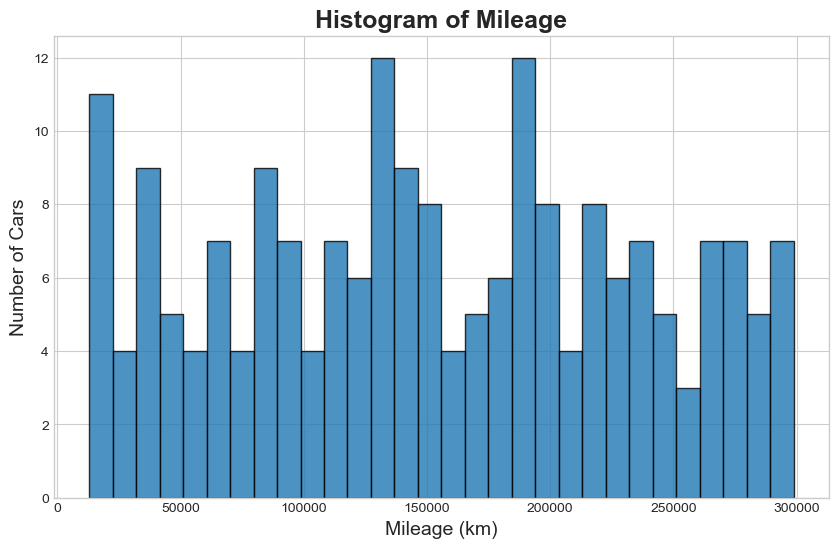

✅ Saved: Poster_Boxplot_Mileage.png


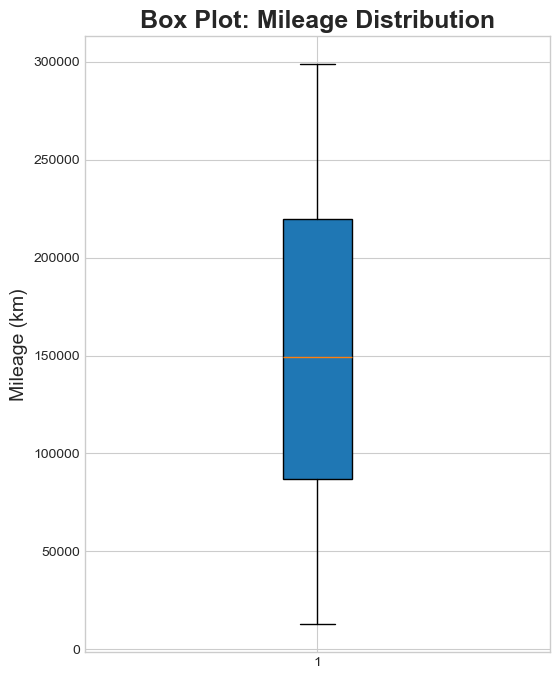

✅ Saved: Poster_Heatmap_Correlation.png


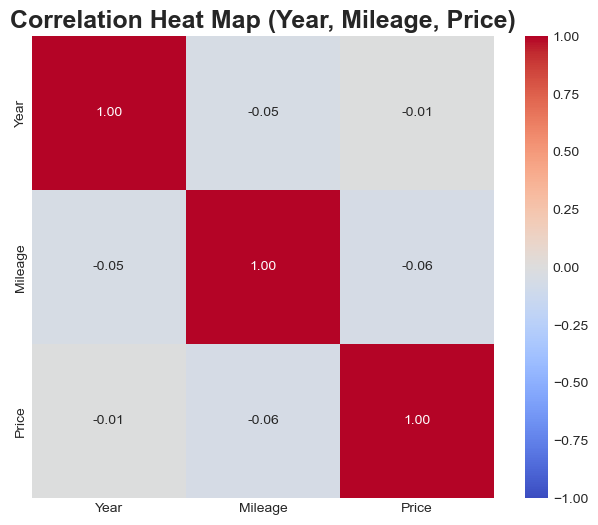

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

# -------------------------------------------------------------------
# 0. Load dataset
# -------------------------------------------------------------------
dataset = pd.read_excel("Data/uae_used_cars_v2.xlsx")  # make sure this path is correct

plt.style.use("seaborn-v0_8-whitegrid")

def save_and_show(name):
    plt.savefig(f"Poster_{name}.png", dpi=300, bbox_inches="tight")
    print(f"✅ Saved: Poster_{name}.png")
    plt.show()   # show on screen
    plt.close()

# -------------------------------------------------------------------
# 1. Bar chart – Fuel type distribution
# -------------------------------------------------------------------
plt.figure(figsize=(10, 6))
fuel_counts = dataset["Fuel Type"].value_counts()
sns.barplot(x=fuel_counts.index, y=fuel_counts.values)
plt.title("Fuel Type Distribution", fontsize=18, weight="bold")
plt.xlabel("Fuel Type", fontsize=14)
plt.ylabel("Number of Cars", fontsize=14)
save_and_show("FuelType_Distribution")

# -------------------------------------------------------------------
# 2. Scatter – Mileage vs Year by Fuel Type
# -------------------------------------------------------------------
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=dataset,
    x="Mileage",
    y="Year",
    hue="Fuel Type",
    alpha=0.7,
    s=40
)
plt.title("Mileage vs Year by Fuel Type", fontsize=18, weight="bold")
plt.xlabel("Mileage (km)", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.legend(title="Fuel Type", fontsize=10)
save_and_show("Scatter_Mileage_Year_FuelType")

# -------------------------------------------------------------------
# 3. Histogram – Mileage
# -------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.hist(dataset["Mileage"].dropna(), bins=30, edgecolor="black", alpha=0.8)
plt.title("Histogram of Mileage", fontsize=18, weight="bold")
plt.xlabel("Mileage (km)", fontsize=14)
plt.ylabel("Number of Cars", fontsize=14)
save_and_show("Histogram_Mileage")

# -------------------------------------------------------------------
# 4. Box Plot – Mileage
# -------------------------------------------------------------------
plt.figure(figsize=(6, 8))
plt.boxplot(dataset["Mileage"].dropna(), vert=True, patch_artist=True)
plt.title("Box Plot: Mileage Distribution", fontsize=18, weight="bold")
plt.ylabel("Mileage (km)", fontsize=14)
save_and_show("Boxplot_Mileage")

# -------------------------------------------------------------------
# 5. Heatmap – Correlation between numeric variables
# -------------------------------------------------------------------
numeric_cols = ["Year", "Mileage", "Price"]
corr = dataset[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    fmt=".2f"
)
plt.title("Correlation Heat Map (Year, Mileage, Price)", fontsize=18, weight="bold")
save_and_show("Heatmap_Correlation")
